# Final Project — Global COVID-19 Vaccinations and Quality of Governance

<b>Data Sources:</b>
- The source for the COVID-19 Vaccination dataset can be found here: https://www.kaggle.com/gpreda/covid-world-vaccination-progress, which consists of data collated from here: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations. 
- The source for the Quality of Governance dataset is the World Bank and can be found here: https://info.worldbank.org/governance/wgi/. 

Access to both datasets in this project is free and open to the public and does not violate any laws.

<b>Context:</b>

As more people in the US receive COVID vaccinations, the lack of vaccinations in other parts of the world becomes more and more apparent and concerning. We should wonder why some countries have made more progress than others in terms of delivering vaccines to their populations. To address this, the specific goal for this project is to examine the impact of a country's quality of governance on the amount of vaccines it has administered so far. 

<b>What is quality of governance?</b> For the purposes of this analysis, quality of governance is essentially how well a country runs. The dataset used here captures six world governance indicators (WGI):
   1. <b>Voice and Accountability</b>: Reflects perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media.
   2. <b>Political Stability and Absence of Violence</b>: Measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism.
   3. <b>Government Effectiveness</b>: Reflects perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies.
   4. <b>Regulatory Quality</b>: Reflects perceptions of the ability of the government to formulate and implement sound policies and regulations that permit and promote private sector development.
   5. <b>Rule of Law</b>: Reflects perceptions of the extent to which agents have confidence in and abide by the rules of society, and in particular the quality of contract enforcement, property rights, the police, and the courts, as well as the likelihood of crime and violence.
   6. <b>Control of Corruption</b>: Reflects perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as "capture" of the state by elites and private interests.
   
I want to ask the question: <b>Does the amount of vaccines delivered to people differ based on a country's quality of governance, according to a given indicator?</b>
   
Estimates for a country for any given WGI range from -2.5(weak governance) to 2.5 (strong governance). Estimates are designed to be normally distributed about 0. More on the methodology for calculating these WGIs can be found here: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1682130. 

<b>Previous Research/Analyses:</b>
- Dataset 1 Global COVID Vaccinations: there have been several analyses done using this dataset that explore what country-level factors correlate with vaccinations. These range from public health expenditure, GDP, etc., but do not look at indicators of quality of governance. 
- Dataset 2 World Governance Indicators: there have been a couple of analyses that try to examine the effect of governance on COVID-19 mortality and COVID-19 policy responses, but none that compare governance and vaccination progress. 

<b>Hypothesis:</b>

My previous experiences in political science/international relations research qualify me to conduct this analysis, and <b>I hypothesize that countries with better governance are able to deliver more vaccines to their populations</b>. Through the analysis, we should be able to see which, if any, governance indicators are more relible signals of this hypothesized trend. 

<b>Data Overview:</b>

Prior to processing, the COVID Vaccination dataset is 3.1 MB with 15666 rows and 15 columns. The World Governance Indicator dataset is 1.8 MB with 216 rows and 128 columns. 

In [1]:
# Import necessary packages
import pandas as pd
import re
from functools import reduce
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as mc
#!pip install pingouin
import pingouin as pg

In [2]:
# Package Versions
print('pandas:', pd.__version__, 
      '\nre:', re.__version__,  
      '\nseaborn:', sns.__version__, 
      '\npingouin:', pg.__version__)

pandas: 1.1.3 
re: 2.2.1 
seaborn: 0.11.0 
pingouin: 0.3.11


## Load The Data
———————————————————————————————————————————————————————————————————————

### Dataset 1. Global COVID-19 Vaccinations:

In [3]:
# Load the vaccine csv file
vax_df = pd.read_csv('Final_Project_Raw_Data/country_vaccinations_update1.csv')

In [4]:
# Determine number of rows and columns 
print('Rows: ', vax_df.shape[0], '\nColumns: ', vax_df.shape[1])

Rows:  15666 
Columns:  15


In [5]:
# Take a look at the kind of information this dataset gives us
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15666 non-null  object 
 1   iso_code                             15666 non-null  object 
 2   date                                 15666 non-null  object 
 3   total_vaccinations                   9437 non-null   float64
 4   people_vaccinated                    8754 non-null   float64
 5   people_fully_vaccinated              6502 non-null   float64
 6   daily_vaccinations_raw               7928 non-null   float64
 7   daily_vaccinations                   15465 non-null  float64
 8   total_vaccinations_per_hundred       9437 non-null   float64
 9   people_vaccinated_per_hundred        8754 non-null   float64
 10  people_fully_vaccinated_per_hundred  6502 non-null   float64
 11  daily_vaccinations_per_milli

In [6]:
# Let's take a look at the actual data
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
vax_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [7]:
vax_df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15661,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15662,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15663,Zimbabwe,ZWE,2021-05-04,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15664,Zimbabwe,ZWE,2021-05-05,576233.0,461023.0,115210.0,16456.0,16889.0,3.88,3.10,0.78,1136.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15665,Zimbabwe,ZWE,2021-05-06,607355.0,478174.0,129181.0,31122.0,18537.0,4.09,3.22,0.87,1247.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...


### Dataset 2. World Governance Indicators

##### Attempt 1: The first attempt at loading this dataset shows there is some documentation in the first few rows. The actual data starts with row 12.

In [8]:
# Load the sheets for each indicator from the excel file
wgi_xlsx = 'Final_Project_Raw_Data/WGI_dataset.xlsx'

sheet1_df = pd.read_excel(wgi_xlsx, sheet_name='VoiceandAccountability')

In [9]:
# It looks like there is some documentation in the first few rows of the sheets so we will have to skip those
sheet1_df.head(20)

,Voice and Accountability,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,Reflects perceptions of the extent to which a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Legend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Estimate,Estimate of governance (ranges from approximat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,StdErr,Standard error reflects variability around the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##### Attempt 2: Load each excel sheet and skip the first 12 rows 

In [10]:
# Load the sheets for each indicator from the excel file AND skip first 12 rows of documentation

wgi1_voice_and_accountability_df = pd.read_excel(wgi_xlsx, sheet_name='VoiceandAccountability', skiprows=range(12))
wgi2_political_stability_df      = pd.read_excel(wgi_xlsx, sheet_name='Political StabilityNoViolence', skiprows=range(12))
wgi3_gov_effectiveness_df        = pd.read_excel(wgi_xlsx, sheet_name='GovernmentEffectiveness', skiprows=range(12))
wgi4_regulatory_quality_df       = pd.read_excel(wgi_xlsx, sheet_name='RegulatoryQuality', skiprows=range(12))
wgi5_rule_of_law_df              = pd.read_excel(wgi_xlsx, sheet_name='RuleofLaw', skiprows=range(12))
wgi6_control_of_corruption_df    = pd.read_excel(wgi_xlsx, sheet_name='ControlofCorruption', skiprows=range(12))

<b>NOTE</b>: The missing column names will be addressed in the data cleaning process.

In [11]:
wgi1_voice_and_accountability_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737521,0.338822,1,73.0769,56.25,88.9423,1.15323,0.357602,1,85.5769,64.9038,100,1.01727,0.491849,1,80.2885,53.8462,100,0.972129,0.511656,1,78.3654,52.8846,100,0.967198,0.511172,1,79.3269,51.4423,100,1.25234,0.259899,2,91.4692,71.564,100,1.28188,0.2394,2,90.9953,72.9858,100,1.27359,0.234903,2,90.6103,74.6479,100,1.28465,0.209523,2,90.6103,76.0563,97.6526,1.27806,0.20331,2,90.6103,75.5869,97.6526,1.27682,0.267147,1,92.1182,71.9212,100,1.27394,0.27642,1,91.6256,72.4138,100,1.27937,0.291444,1,92.1182,71.9212,100,1.29432,0.28228,1,92.6108,73.8916,100,1.30602,0.249329,1,91.6256,77.3399,99.5074,1.29419,0.268796,1,92.6108,73.8916,100
3,Andorra,ADO,1.56322,0.291691,3,98.5,81.5,100,1.52876,0.291445,3,97.5124,78.607,100,1.53566,0.291283,3,97.0149,80.597,100,1.43713,0.272818,3,95.5224,74.6269,100,1.42226,0.2

In [12]:
wgi2_political_stability_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993855,0.426389,1,80.5825,54.8544,100,1.37985,0.370205,2,96.1165,68.932,100,1.30575,0.363784,2,96.1353,68.1159,100,1.28716,0.331088,2,96.6184,71.0145,100,1.31914,0.333069,2,96.1538,72.1154,100,1.1225,0.311762,3,88.6256,67.2986,100,1.10085,0.301821,3,88.1517,66.3507,99.5261,1.28574,0.294137,3,93.8389,70.6161,99.5261,1.26388,0.267992,3,93.3649,72.9858,99.5261,1.31223,0.279365,3,94.7867,73.4597,99.5261,1.16457,0.235651,3,92.381,72.381,99.5238,1.23092,0.241163,3,93.3333,72.381,99.5238,1.2842,0.244329,3,94.2857,75.7143,99.5238,1.33476,0.254837,3,95.7143,80,99.5238,1.36298,0.25148,3,95.7143,81.9048,99.5238,1.35737,0.271196,3,95.2381,79.0476,99.5238
3,Andorra,ADO,1.17016,0.613507,1,89.3617,52.1277,100,1.18364,0.575733,1,90.4255,54.7872,100,1.167,0.597071,1,86.7725,54.4974,100,1.28204,0.520825,1,92.5926

In [13]:
wgi3_gov_effectiveness_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30171,0.411079,1,88.1773,72.9064,95.5665,1.29286,0.30696,1,88.2353,75,95.5882,1.28533,0.433776,1,87.8049,69.7561,98.0488,1.25298,0.469347,1,86.8932,69.9029,97.5728,1.27933,0.452218,1,86.4078,69.4175,98.0583,1.50057,0.322891,2,89.9522,78.4689,98.0861,1.25172,0.335292,2,85.6459,72.2488,96.1722,1.24213,0.329361,2,84.8341,72.5118,96.2085,1.25473,0.314128,2,85.782,72.5118,95.2607,1.22707,0.301569,2,84.8341,72.5118,94.7867,0.891651,0.35158,2,75.4808,64.4231,89.9038,0.883569,0.330626,2,76.4423,65.3846,87.9808,0.893229,0.320727,2,76.4423,67.3077,90.8654,0.917742,0.334729,2,79.3269,66.3462,91.8269,1.05839,0.331872,2,80.2885,71.1538,92.7885,1.02993,0.328407,2,80.2885,69.7115,92.3077
3,Andorra,ADO,1.41404,0.187618,1,88.5246,83.6066,91.2568,1.46205,0.310279,1,88.601,82.3834,95.8549,1.44628,0.343066,1,88.717

In [14]:
wgi4_regulatory_quality_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.771958,0.320425,1,73.8916,62.5616,86.6995,0.866325,0.213311,1,75,65.1961,83.8235,0.85605,0.305461,1,75.4902,61.2745,91.1765,0.877562,0.366225,1,77.1845,59.7087,91.2621,0.89455,0.382018,1,78.6408,59.7087,92.7184,1.29165,0.32943,2,86.6029,73.6842,99.5215,1.34708,0.352458,2,87.0813,75.5981,100,1.32283,0.355782,2,87.6777,75.8294,99.5261,1.40892,0.343007,2,90.5213,76.7773,100,1.42911,0.334647,2,90.5213,77.2512,100,1.25043,0.353025,2,88.4615,73.0769,97.1154,1.3715,0.336364,2,90.3846,76.4423,99.0385,1.34755,0.359692,2,88.9423,75.4808,98.0769,1.19176,0.3507,2,84.1346,72.1154,94.7115,0.856631,0.365398,2,77.8846,62.5,90.3846,0.85736,0.35908,2,75.9615,63.4615,90.8654
3,Andorra,ADO,1.26644,0.38636,1,88.0435,69.5652,98.913,1.3007,0.451397,1,89.6373,68.9119,98.9637,1.276,0.426612,1,88.2051,70.7692,98.9744,1.4

In [15]:
wgi5_rule_of_law_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.929806,0.350057,1,80.8612,61.244,91.866,0.857203,0.366645,1,78.4689,58.8517,90.9091,0.820513,0.407669,1,73.2057,57.4163,90.4306,0.839394,0.384279,1,77.0335,58.8517,89.9522,0.855813,0.358583,1,77.8846,59.1346,89.9038,1.4332,0.232073,2,89.5735,82.9384,96.6825,1.42298,0.234607,3,90.0474,82.4645,96.6825,1.33082,0.221853,3,87.7934,79.8122,92.9577,1.31621,0.228282,3,86.8545,78.8732,92.4883,1.29977,0.231907,3,86.8545,77.9343,92.4883,1.03831,0.275912,3,81.7308,72.5962,88.4615,1.26103,0.261762,3,85.5769,77.4038,91.3462,1.26174,0.24813,3,87.0192,78.3654,91.8269,1.33098,0.223952,3,87.0192,80.2885,93.2692,1.29676,0.209585,3,87.0192,78.8462,91.8269,1.26313,0.211013,3,86.5385,78.8462,91.8269
3,Andorra,ADO,1.15836,0.388865,2,86.4322,63.3166,96.9849,1.21321,0.365499,2,85,70,97,1.31213,0.3121,2,86.6337,74.2574,9

In [16]:
wgi6_control_of_corruption_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.18447,0.395906,1,85.3659,72.1951,92.6829,1.27815,0.341567,1,88.2927,73.6585,93.1707,1.25953,0.419886,1,88.2927,72.1951,94.6341,1.26996,0.41629,1,88.835,72.3301,93.6893,1.28866,0.402988,1,87.8641,73.7864,94.6602,1.11636,0.293201,2,84.2105,72.7273,91.3876,1.12721,0.293344,2,84.2857,72.381,92.381,1.10998,0.296204,2,83.4123,72.0379,91.9431,1.10298,0.313355,2,82.9384,72.0379,91.4692,1.1266,0.309363,2,82.9384,71.564,91.4692,1.01892,0.304744,2,81.7308,69.2308,90.8654,1.29711,0.290557,2,88.4615,76.9231,92.7885,1.28585,0.307186,2,89.4231,76.9231,92.7885,1.29166,0.282385,2,87.9808,79.8077,92.3077,1.25221,0.282708,2,87.0192,79.3269,92.3077,1.21724,0.286103,2,85.0962,75.9615,92.3077
3,Andorra,ADO,1.31814,0.480889,1,87.0968,72.043,96.7742,1.3777,0.461773,1,89.1753,74.7423,96.9072,1.35971,0.473483,1,88.8325,7

##### Each indicator has the same number of rows and columns.

In [17]:
# Determine number of rows and columns for each indicator
print('wgi1_voice_and_accountability_df\nRows: ', wgi1_voice_and_accountability_df.shape[0], '\nColumns: ', wgi1_voice_and_accountability_df.shape[1], '\n')
print('wgi2_political_stability_df\nRows: ', wgi2_political_stability_df.shape[0], '\nColumns: ', wgi2_political_stability_df.shape[1], '\n')
print('wgi3_gov_effectiveness_df\nRows: ', wgi3_gov_effectiveness_df.shape[0], '\nColumns: ', wgi3_gov_effectiveness_df.shape[1], '\n')
print('wgi4_regulatory_quality_df\nRows: ', wgi4_regulatory_quality_df.shape[0], '\nColumns: ', wgi4_regulatory_quality_df.shape[1], '\n')
print('wgi5_rule_of_law_df\nRows: ', wgi5_rule_of_law_df.shape[0], '\nColumns: ', wgi5_rule_of_law_df.shape[1], '\n')
print('wgi6_control_of_corruption_df\nRows: ', wgi6_control_of_corruption_df.shape[0], '\nColumns: ', wgi6_control_of_corruption_df.shape[1], '\n')

wgi1_voice_and_accountability_df
Rows:  216 
Columns:  128 

wgi2_political_stability_df
Rows:  216 
Columns:  128 

wgi3_gov_effectiveness_df
Rows:  216 
Columns:  128 

wgi4_regulatory_quality_df
Rows:  216 
Columns:  128 

wgi5_rule_of_law_df
Rows:  216 
Columns:  128 

wgi6_control_of_corruption_df
Rows:  216 
Columns:  128 



## Data Cleaning

### Dataset 1 Global COVID-19 Vaccinations: Check Datatypes
———————————————————————————————————————————————————————————————————————


In [18]:
# Check datatypes
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15666 non-null  object 
 1   iso_code                             15666 non-null  object 
 2   date                                 15666 non-null  object 
 3   total_vaccinations                   9437 non-null   float64
 4   people_vaccinated                    8754 non-null   float64
 5   people_fully_vaccinated              6502 non-null   float64
 6   daily_vaccinations_raw               7928 non-null   float64
 7   daily_vaccinations                   15465 non-null  float64
 8   total_vaccinations_per_hundred       9437 non-null   float64
 9   people_vaccinated_per_hundred        8754 non-null   float64
 10  people_fully_vaccinated_per_hundred  6502 non-null   float64
 11  daily_vaccinations_per_milli

#### 1. Convert date column to datetime object: 

In [19]:
vax_df['date'] = pd.to_datetime(vax_df['date'], format='%Y-%m-%d')

In [20]:
# Sanity Check: Double check to make sure that worked
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              15666 non-null  object        
 1   iso_code                             15666 non-null  object        
 2   date                                 15666 non-null  datetime64[ns]
 3   total_vaccinations                   9437 non-null   float64       
 4   people_vaccinated                    8754 non-null   float64       
 5   people_fully_vaccinated              6502 non-null   float64       
 6   daily_vaccinations_raw               7928 non-null   float64       
 7   daily_vaccinations                   15465 non-null  float64       
 8   total_vaccinations_per_hundred       9437 non-null   float64       
 9   people_vaccinated_per_hundred        8754 non-null   float64       
 10  people_ful

### Dataset 1 Global COVID-19 Vaccinations: Duplicate and/or Irrelevant data
———————————————————————————————————————————————————————————————————————

#### 1. Most recent rows only: 
Many rows in this dataset are daily updates as more vaccines have been acquired/distributed. So, we can focus on only the most up-to-date row for each country and drop the olders ones. 

In [21]:
# Range of data
# First entry in the entire dataset
oldest_entry = vax_df['date'].min()
# Last entry in the entire dataset
most_recent_entry = vax_df['date'].max()

print('First Entry:', oldest_entry, '\nMost Recent Entry:', most_recent_entry)

First Entry: 2020-12-14 00:00:00 
Most Recent Entry: 2021-05-06 00:00:00


In [22]:
def get_recent_vaccines(df):
    """
    Given a dataframe, creates a new dataframe of only the most recent row for each country
    
    Parameters:
    –––––––––––
    df: pandas dataframe
    
    Returns:
    ––––––––
    new_df: pandas dataframe
    """
    new_df = pd.DataFrame()
    countries = list(df['country'].unique())
    for country in countries:
        #find the dates a country has entries for
        dates = df['date'].loc[df['country'] == country]
        #find the most recent entry for the country
        most_recent_date = max(dates)
        new_df = new_df.append(df.loc[(df['country'] == country) & (df['date'] == most_recent_date)])
        
    return new_df

In [23]:
# Create new dataframe of recent vaccinations and reset index
recent_vax_df = get_recent_vaccines(vax_df).copy()
recent_vax_df.reset_index(drop=True, inplace=True)

We may notice that some data has not been updated in quite a while. For example, the last time data was input for Algeria was Feb. 19, 2021!

In [24]:
recent_vax_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Albania,ALB,2021-05-06,572226.0,NaN,NaN,15642.0,16997.0,19.88,NaN,NaN,5906.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://twitter.com/gmanastirliu/status/139037...
2,Algeria,DZA,2021-02-19,75000.0,NaN,NaN,NaN,3748.0,0.17,NaN,NaN,85.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
3,Andorra,AND,2021-05-03,28881.0,24182.0,4699.0,NaN,54.0,37.38,31.30,6.08,699.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
4,Angola,AGO,2021-04-23,456349.0,456349.0,NaN,NaN,16736.0,1.39,1.39,NaN,509.0,Oxford/AstraZeneca,Ministry of Health,https://www.angop.ao/en/noticias/saude/covid-1...


#### 2. Some data is still too old to be used:
To get a good picture of how vaccine delivery relates to our world goverance indicators, the number of vaccinations needs to be fairly recent. The vaccination data for some countries has not been updated since February or March. Therefore, we should eliminate the countries whose data has not been updated since March.  

Fortunately, the histogram below shows that this will not eliminate a large number of countries from the dataset.

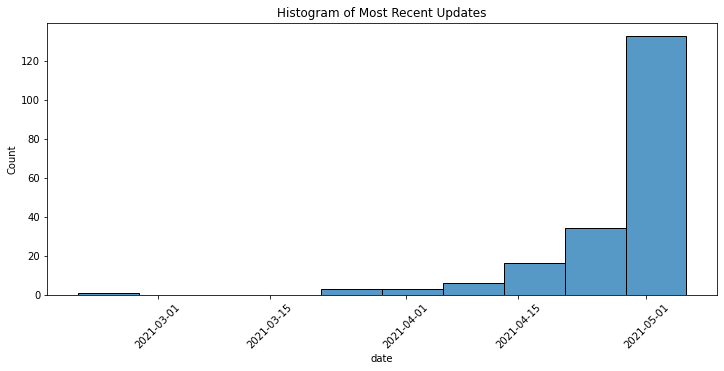

In [25]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)
_ = sns.histplot(x='date', data=recent_vax_df, bins=10).set(title='Histogram of Most Recent Updates')

Specifically, we will be dropping the following countries.

In [26]:
dropped_countries_vax = recent_vax_df[['country', 'iso_code', 'date']].loc[recent_vax_df['date'] <= '2021-03-31']
dropped_countries_vax

,country,iso_code,date
2,Algeria,DZA,2021-02-19
8,Armenia,ARM,2021-03-31
31,Cape Verde,CPV,2021-03-24
111,Mauritius,MUS,2021-03-24
119,Mozambique,MOZ,2021-03-23
120,Myanmar,MMR,2021-03-31
153,Sao Tome and Principe,STP,2021-03-29


In [27]:
# Create new dataframe that excludes those countries
recent_vax_df = recent_vax_df.loc[recent_vax_df['date'] > '2021-03-31'].copy()
print('Current Number of Rows: ', recent_vax_df.shape[0], '\nCurrent Number of Columns: ', recent_vax_df.shape[1])

Current Number of Rows:  189 
Current Number of Columns:  15


##### -------Sanity Check: Is the earliest entry in the dataset now after March? Yes!-------

In [28]:
recent_vax_df['date'].min()

Timestamp('2021-04-08 00:00:00')

### Dataset 1 Global COVID-19 Vaccinations: Missing Values
———————————————————————————————————————————————————————————————————————

There are a number of missing values in some of the columns for this dataset. 

In [29]:
# Characterize missing values in the data
recent_vax_df.isna().sum()

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      3
people_vaccinated                      13
people_fully_vaccinated                67
daily_vaccinations_raw                 83
daily_vaccinations                      9
total_vaccinations_per_hundred          3
people_vaccinated_per_hundred          13
people_fully_vaccinated_per_hundred    67
daily_vaccinations_per_million          9
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

The following columns are most relevant for this analysis, so missing values in other columns can be disregarded:
- total_vaccinations ------------------------ total number of doses administered
- people_vaccinated ----------------------- number of people partially vaccinated
- people_fully_vaccinated ----------------- number of people fully vaccinated
- total_vaccinations_per_hundred -------- number of doses administered as a ratio of population
- people_vaccinated_per_hundred ------- percentage of population partially vaccinated
- people_fully_vaccinated_per_hundred - percentage of population fully vaccinated

However, there are still some missing values in these columns. See percentages below.

In [30]:
print('Percent of values missing: \n', 
      'total_vaccinations                 ', str(round((recent_vax_df['total_vaccinations'].isna().sum()/recent_vax_df['total_vaccinations'].count()*100), 2)),'%\n', 
      'people_vaccinated                  ', str(round((recent_vax_df['people_vaccinated'].isna().sum()/recent_vax_df['people_vaccinated'].count()*100), 2)),'%\n', 
      'people_fully_vaccinated            ', str(round((recent_vax_df['people_fully_vaccinated'].isna().sum()/recent_vax_df['people_fully_vaccinated'].count()*100), 2)),'%\n', 
      'total_vaccinations_per_hundred     ', str(round((recent_vax_df['total_vaccinations_per_hundred'].isna().sum()/recent_vax_df['total_vaccinations_per_hundred'].count()*100), 2)),'%\n', 
      'people_vaccinated_per_hundred      ', str(round((recent_vax_df['people_vaccinated_per_hundred'].isna().sum()/recent_vax_df['people_vaccinated_per_hundred'].count()*100), 2)),'%\n',
      'people_fully_vaccinated_per_hundred', str(round((recent_vax_df['people_fully_vaccinated_per_hundred'].isna().sum()/recent_vax_df['people_fully_vaccinated_per_hundred'].count()*100), 2)),'%\n')

Percent of values missing: 
 total_vaccinations                  1.61 %
 people_vaccinated                   7.39 %
 people_fully_vaccinated             54.92 %
 total_vaccinations_per_hundred      1.61 %
 people_vaccinated_per_hundred       7.39 %
 people_fully_vaccinated_per_hundred 54.92 %



Rather than drop all null these values at this stage, I will keep them and just before analyses involving specific columns I will select all non-null values. This way I won't lose potentially meaningful information and I can maximize the amount of meaningful data for each individual analysis.

<b>NOTE</b>: The lack of data in the column for people who are fully vaccinated might be meaningful. Future analyses, could look at which countries are missing this data and see if there is any pattern that might explain this.

### Dataset 2 World Governance Indicators: Dataframe Readability
———————————————————————————————————————————————————————————————————————

Before we can do any other data cleaning, we must create meaninful column names. 

In [31]:
# Make a list of all the WGI dataframes so we can easily apply any cleaning to each one via looping
all_wgi_df = [wgi1_voice_and_accountability_df, 
              wgi2_political_stability_df, 
              wgi3_gov_effectiveness_df, 
              wgi4_regulatory_quality_df, 
              wgi5_rule_of_law_df, 
              wgi6_control_of_corruption_df]

#### 1. Fix the missing column names

When we loaded the data for the World Governance Indicators, there were not any useful columns names. See below. To fix this, we can use the values in each column from the first two rows to make a unique and meaningful column name. That makes each column name a combination of the year and the variable it captures.

In [32]:
wgi1_voice_and_accountability_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737521,0.338822,1,73.0769,56.25,88.9423,1.15323,0.357602,1,85.5769,64.9038,100,1.01727,0.491849,1,80.2885,53.8462,100,0.972129,0.511656,1,78.3654,52.8846,100,0.967198,0.511172,1,79.3269,51.4423,100,1.25234,0.259899,2,91.4692,71.564,100,1.28188,0.2394,2,90.9953,72.9858,100,1.27359,0.234903,2,90.6103,74.6479,100,1.28465,0.209523,2,90.6103,76.0563,97.6526,1.27806,0.20331,2,90.6103,75.5869,97.6526,1.27682,0.267147,1,92.1182,71.9212,100,1.27394,0.27642,1,91.6256,72.4138,100,1.27937,0.291444,1,92.1182,71.9212,100,1.29432,0.28228,1,92.6108,73.8916,100,1.30602,0.249329,1,91.6256,77.3399,99.5074,1.29419,0.268796,1,92.6108,73.8916,100
3,Andorra,ADO,1.56322,0.291691,3,98.5,81.5,100,1.52876,0.291445,3,97.5124,78.607,100,1.53566,0.291283,3,97.0149,80.597,100,1.43713,0.272818,3,95.5224,74.6269,100,1.42226,0.2

We can use a function to rename all the columns in each World Governance Indicator dataframe according to the format described above.

In [33]:
def rename_columns(df, df_num):
    """
    Given a dataframe and wgi number, renames each column according to its position in the dataframe
    The new first column name is : the governance indicator number and 'Country/Territory'
    The new second column name is : 'Code'
    All other columns : a combination of 'year', the kind of value present in the column (i.e., Estimate), and the wgi number
    
    Parameters:
    –––––––––––
    df: dataframe
    df_num: int
        indicates which indicator the column corresponds to
        
    Returns:
    ––––––––
    df: dataframe
    """
    for column in range(df.shape[1]):
        
        # For the 1st column with the name of the country only use the value of the 2nd row
        if column == 0:
            new_col_name = 'wgi' + str(df_num) + '_' + str(df[f'Unnamed: {column}'][1])
            
        # For the 2nd column with the country's iso-code only use the value of the 2nd row
        elif column == 1: 
            new_col_name = str(df[f'Unnamed: {column}'][1])
        
        # For all the other columns we need the values from both the 1st and 2nd rows
        else:
            new_col_name = str(df[f'Unnamed: {column}'][0]) + '_' + str(df[f'Unnamed: {column}'][1]) + '_wgi' + str(df_num)
        
        df.rename(columns={f'Unnamed: {column}': new_col_name}, inplace=True)
    
    return df

In [34]:
# apply function to all wgi dataframes
ctr = 1
for df in all_wgi_df: 
    rename_columns(df, ctr)
    ctr += 1

##### -------Sanity Check: Did that successfully rename the columns as expected. Yes!-------

In [35]:
wgi1_voice_and_accountability_df.head()

,wgi1_Country/Territory,Code,1996_Estimate_wgi1,1996_StdErr_wgi1,1996_NumSrc_wgi1,1996_Rank_wgi1,1996_Lower_wgi1,1996_Upper_wgi1,1998_Estimate_wgi1,1998_StdErr_wgi1,1998_NumSrc_wgi1,1998_Rank_wgi1,1998_Lower_wgi1,1998_Upper_wgi1,2000_Estimate_wgi1,2000_StdErr_wgi1,2000_NumSrc_wgi1,2000_Rank_wgi1,2000_Lower_wgi1,2000_Upper_wgi1,2002_Estimate_wgi1,2002_StdErr_wgi1,2002_NumSrc_wgi1,2002_Rank_wgi1,2002_Lower_wgi1,2002_Upper_wgi1,2003_Estimate_wgi1,2003_StdErr_wgi1,2003_NumSrc_wgi1,2003_Rank_wgi1,2003_Lower_wgi1,2003_Upper_wgi1,2004_Estimate_wgi1,2004_StdErr_wgi1,2004_NumSrc_wgi1,2004_Rank_wgi1,2004_Lower_wgi1,2004_Upper_wgi1,2005_Estimate_wgi1,2005_StdErr_wgi1,2005_NumSrc_wgi1,2005_Rank_wgi1,2005_Lower_wgi1,2005_Upper_wgi1,2006_Estimate_wgi1,2006_StdErr_wgi1,2006_NumSrc_wgi1,2006_Rank_wgi1,2006_Lower_wgi1,2006_Upper_wgi1,2007_Estimate_wgi1,2007_StdErr_wgi1,2007_NumSrc_wgi1,2007_Rank_wgi1,2007_Lower_wgi1,2007_Upper_wgi1,2008_Estimate_wgi1,2008_StdErr_wgi1,2008_NumSrc_wgi1,2008_Rank_wgi1,2008_Lower_wgi1,2008_Upper_wgi1,2009_Estimate_wgi1,2009_StdErr_wgi1,2009_NumSrc_wgi1,2009_Rank_wgi1,2009_Lower_wgi1,2009_Upper_wgi1,2010_Estimate_wgi1,2010_StdErr_wgi1,2010_NumSrc_wgi1,2010_Rank_wgi1,2010_Lower_wgi1,2010_Upper_wgi1,2011_Estimate_wgi1,2011_StdErr_wgi1,2011_NumSrc_wgi1,2011_Rank_wgi1,2011_Lower_wgi1,2011_Upper_wgi1,2012_Estimate_wgi1,2012_StdErr_wgi1,2012_NumSrc_wgi1,2012_Rank_wgi1,2012_Lower_wgi1,2012_Upper_wgi1,2013_Estimate_wgi1,2013_StdErr_wgi1,2013_NumSrc_wgi1,2013_Rank_wgi1,2013_Lower_wgi1,2013_Upper_wgi1,2014_Estimate_wgi1,2014_StdErr_wgi1,2014_NumSrc_wgi1,2014_Rank_wgi1,2014_Lower_wgi1,2014_Upper_wgi1,2015_Estimate_wgi1,2015_StdErr_wgi1,2015_NumSrc_wgi1,2015_Rank_wgi1,2015_Lower_wgi1,2015_Upper_wgi1,2016_Estimate_wgi1,2016_StdErr_wgi1,2016_NumSrc_wgi1,2016_Rank_wgi1,2016_Lower_wgi1,2016_Upper_wgi1,2017_Estimate_wgi1,2017_StdErr_wgi1,2017_NumSrc_wgi1,2017_Rank_wgi1,2017_Lower_wgi1,2017_Upper_wgi1,2018_Estimate_wgi1,2018_StdErr_wgi1,2018_NumSrc_wgi1,2018_Rank_wgi1,2018_Lower_wgi1,2018_Upper_wgi1,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1
0,NaN,NaN,1996,1996,1996,1996,1996,1996,1998,1998,1998,1998,1998,1998,2000,2000,2000,2000,2000,2000,2002,2002,2002,2002,2002,2002,2003,2003,2003,2003,2003,2003,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005,2005,2005,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019
1,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate,StdErr,NumSrc,Rank,Lower,Upper
2,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737521,0.338822,1,73.0769,56.25,88.9423,1.15323,0.357602,1,85.5769,64.9038,100,1.01727,0.491849,1,80.2885,53.8462,100,0.972129,0.511656,1,78.3654,52.8846,100,0.967198,0.511172,1,79.3269,51.4423,100,1.25234,0.259899,2,91.4692,71.564,

In [36]:
# Drop the first two rows since we captured that info in the column headers
def drop_and_reindex(a_df):
    """
    drops the first two rows in a dataframe and resets the index
    
    Parameters:
    –––––––––––
    a_df: dataframe
    
    Returns:
    ––––––––
    a_df: dataframe
    """
    a_df.drop([0, 1], inplace=True)
    a_df = a_df.reset_index(drop=True, inplace=True)
    
    return a_df

In [37]:
# Apply function to drop 1st two rows and reset index to all WGI dataframes
for df in all_wgi_df:
    drop_and_reindex(df)

##### -------Sanity Check: Make sure we didn't drop any meaningful data. Looks good!-------

In [38]:
wgi6_control_of_corruption_df.head()

,wgi6_Country/Territory,Code,1996_Estimate_wgi6,1996_StdErr_wgi6,1996_NumSrc_wgi6,1996_Rank_wgi6,1996_Lower_wgi6,1996_Upper_wgi6,1998_Estimate_wgi6,1998_StdErr_wgi6,1998_NumSrc_wgi6,1998_Rank_wgi6,1998_Lower_wgi6,1998_Upper_wgi6,2000_Estimate_wgi6,2000_StdErr_wgi6,2000_NumSrc_wgi6,2000_Rank_wgi6,2000_Lower_wgi6,2000_Upper_wgi6,2002_Estimate_wgi6,2002_StdErr_wgi6,2002_NumSrc_wgi6,2002_Rank_wgi6,2002_Lower_wgi6,2002_Upper_wgi6,2003_Estimate_wgi6,2003_StdErr_wgi6,2003_NumSrc_wgi6,2003_Rank_wgi6,2003_Lower_wgi6,2003_Upper_wgi6,2004_Estimate_wgi6,2004_StdErr_wgi6,2004_NumSrc_wgi6,2004_Rank_wgi6,2004_Lower_wgi6,2004_Upper_wgi6,2005_Estimate_wgi6,2005_StdErr_wgi6,2005_NumSrc_wgi6,2005_Rank_wgi6,2005_Lower_wgi6,2005_Upper_wgi6,2006_Estimate_wgi6,2006_StdErr_wgi6,2006_NumSrc_wgi6,2006_Rank_wgi6,2006_Lower_wgi6,2006_Upper_wgi6,2007_Estimate_wgi6,2007_StdErr_wgi6,2007_NumSrc_wgi6,2007_Rank_wgi6,2007_Lower_wgi6,2007_Upper_wgi6,2008_Estimate_wgi6,2008_StdErr_wgi6,2008_NumSrc_wgi6,2008_Rank_wgi6,2008_Lower_wgi6,2008_Upper_wgi6,2009_Estimate_wgi6,2009_StdErr_wgi6,2009_NumSrc_wgi6,2009_Rank_wgi6,2009_Lower_wgi6,2009_Upper_wgi6,2010_Estimate_wgi6,2010_StdErr_wgi6,2010_NumSrc_wgi6,2010_Rank_wgi6,2010_Lower_wgi6,2010_Upper_wgi6,2011_Estimate_wgi6,2011_StdErr_wgi6,2011_NumSrc_wgi6,2011_Rank_wgi6,2011_Lower_wgi6,2011_Upper_wgi6,2012_Estimate_wgi6,2012_StdErr_wgi6,2012_NumSrc_wgi6,2012_Rank_wgi6,2012_Lower_wgi6,2012_Upper_wgi6,2013_Estimate_wgi6,2013_StdErr_wgi6,2013_NumSrc_wgi6,2013_Rank_wgi6,2013_Lower_wgi6,2013_Upper_wgi6,2014_Estimate_wgi6,2014_StdErr_wgi6,2014_NumSrc_wgi6,2014_Rank_wgi6,2014_Lower_wgi6,2014_Upper_wgi6,2015_Estimate_wgi6,2015_StdErr_wgi6,2015_NumSrc_wgi6,2015_Rank_wgi6,2015_Lower_wgi6,2015_Upper_wgi6,2016_Estimate_wgi6,2016_StdErr_wgi6,2016_NumSrc_wgi6,2016_Rank_wgi6,2016_Lower_wgi6,2016_Upper_wgi6,2017_Estimate_wgi6,2017_StdErr_wgi6,2017_NumSrc_wgi6,2017_Rank_wgi6,2017_Lower_wgi6,2017_Upper_wgi6,2018_Estimate_wgi6,2018_StdErr_wgi6,2018_NumSrc_wgi6,2018_Rank_wgi6,2018_Lower_wgi6,2018_Upper_wgi6,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.18447,0.395906,1,85.3659,72.1951,92.6829,1.27815,0.341567,1,88.2927,73.6585,93.1707,1.25953,0.419886,1,88.2927,72.1951,94.6341,1.26996,0.41629,1,88.835,72.3301,93.6893,1.28866,0.402988,1,87.8641,73.7864,94.6602,1.11636,0.293201,2,84.2105,72.7273,91.3876,1.12721,0.293344,2,84.2857,72.381,92.381,1.10998,0.296204,2,83.4123,72.0379,91.9431,1.10298,0.313355,2,82.9384,72.0379,91.4692,1.1266,0.309363,2,82.9384,71.564,91.4692,1.01892,0.304744,2,81.7308,69.2308,90.8654,1.29711,0.290557,2,88.4615,76.9231,92.7885,1.28585,0.307186,2,89.4231,76.9231,92.7885,1.29166,0.282385,2,87.9808,79.8077,92.3077,1.25221,0.282708,2,87.0192,79.3269,92.3077,1.21724,0.286103,2,85.0962,75.9615,92.3077
1,Andorra,ADO,1.31814,0.480889,1,87.0968,72.043,96.7742,1.3777,0.461773,1,89.1753,74.7423,96.9072,1.35971,0.473483,1,88.8325,73.0964,95.4315,1.3499,0.436571,1,88.3838,74.7475,95.4545,1.37669,0.403346,1,88.8889,76.2626,94.9495,1.13741,0.395906,1,84.3902,71.7073,91.7073,1.27815,0.341567,1,88.2927,73.6585,93.1707,1.25953,0.419886,1,88.2927,72.1951,94.6341,1.26996,0.41629,1,88.835,72.3301,93.6893,1.28866,0.402988,1,87.8641,73.7864,94.6602,1.32558,0.427496,1,88.0383,72.7273,95.2153,1.30807,0.431585,1,88.0952,72.381,94.7619,1.27928,0.418033,1,88.1517,72.0379,94.7867,1.26837,0.433578,1,87.2038,71.564,95.2607,1.2608,0.442314,1,86.7299,70.1422,95.7346,1.22522,0.42467,1,87.0192,69.2308,95.1923,1.2185,0.421867,1,87.0192,68.2692,95.1923,1.22878,0.422517,1,87.5,68.75,94.7115,1.24223,0.401676,1,86.5385,70.6731,95.1923,1.2388,0.402436,1,86.5385,71.1538,94.7115,1.23439,0.409163,1,87.5,70.1923,95.1923
2,Afghanistan,AFG,-1.2917,0.340507,2,4.30108,0,27.4194,-1.18085,0.330179,2,9.79381,0,31.4433,-1.29538,0.356294,2,5.07614,0,29.4416,-1.26337,0.359915,2,5.05051,

### Dataset 2 World Governance Indicators: Check Datatypes
———————————————————————————————————————————————————————————————————————

#### 1. Convert from object to float:
All the estimated and statistics in the table are currently string objects. We need them to be floats to do analysis.

<b>However</b>, we should first merge all the governance indicators together into one dataframe to streamline the rest of the cleaning process.

In [39]:
# Merge all the wgi dataframes into one dataframe to look at the datatypes
merged_wgi = reduce(lambda left, right: pd.merge(left, right, on='Code'), all_wgi_df)
merged_wgi.head()

,wgi1_Country/Territory,Code,1996_Estimate_wgi1,1996_StdErr_wgi1,1996_NumSrc_wgi1,1996_Rank_wgi1,1996_Lower_wgi1,1996_Upper_wgi1,1998_Estimate_wgi1,1998_StdErr_wgi1,1998_NumSrc_wgi1,1998_Rank_wgi1,1998_Lower_wgi1,1998_Upper_wgi1,2000_Estimate_wgi1,2000_StdErr_wgi1,2000_NumSrc_wgi1,2000_Rank_wgi1,2000_Lower_wgi1,2000_Upper_wgi1,2002_Estimate_wgi1,2002_StdErr_wgi1,2002_NumSrc_wgi1,2002_Rank_wgi1,2002_Lower_wgi1,2002_Upper_wgi1,2003_Estimate_wgi1,2003_StdErr_wgi1,2003_NumSrc_wgi1,2003_Rank_wgi1,2003_Lower_wgi1,2003_Upper_wgi1,2004_Estimate_wgi1,2004_StdErr_wgi1,2004_NumSrc_wgi1,2004_Rank_wgi1,2004_Lower_wgi1,2004_Upper_wgi1,2005_Estimate_wgi1,2005_StdErr_wgi1,2005_NumSrc_wgi1,2005_Rank_wgi1,2005_Lower_wgi1,2005_Upper_wgi1,2006_Estimate_wgi1,2006_StdErr_wgi1,2006_NumSrc_wgi1,2006_Rank_wgi1,2006_Lower_wgi1,2006_Upper_wgi1,2007_Estimate_wgi1,2007_StdErr_wgi1,2007_NumSrc_wgi1,2007_Rank_wgi1,2007_Lower_wgi1,2007_Upper_wgi1,2008_Estimate_wgi1,2008_StdErr_wgi1,2008_NumSrc_wgi1,2008_Rank_wgi1,2008_Lower_wgi1,2008_Upper_wgi1,2009_Estimate_wgi1,2009_StdErr_wgi1,2009_NumSrc_wgi1,2009_Rank_wgi1,2009_Lower_wgi1,2009_Upper_wgi1,2010_Estimate_wgi1,2010_StdErr_wgi1,2010_NumSrc_wgi1,2010_Rank_wgi1,2010_Lower_wgi1,2010_Upper_wgi1,2011_Estimate_wgi1,2011_StdErr_wgi1,2011_NumSrc_wgi1,2011_Rank_wgi1,2011_Lower_wgi1,2011_Upper_wgi1,2012_Estimate_wgi1,2012_StdErr_wgi1,2012_NumSrc_wgi1,2012_Rank_wgi1,2012_Lower_wgi1,2012_Upper_wgi1,2013_Estimate_wgi1,2013_StdErr_wgi1,2013_NumSrc_wgi1,2013_Rank_wgi1,2013_Lower_wgi1,2013_Upper_wgi1,2014_Estimate_wgi1,2014_StdErr_wgi1,2014_NumSrc_wgi1,2014_Rank_wgi1,2014_Lower_wgi1,2014_Upper_wgi1,2015_Estimate_wgi1,2015_StdErr_wgi1,2015_NumSrc_wgi1,2015_Rank_wgi1,2015_Lower_wgi1,2015_Upper_wgi1,2016_Estimate_wgi1,2016_StdErr_wgi1,2016_NumSrc_wgi1,2016_Rank_wgi1,2016_Lower_wgi1,2016_Upper_wgi1,2017_Estimate_wgi1,2017_StdErr_wgi1,2017_NumSrc_wgi1,2017_Rank_wgi1,2017_Lower_wgi1,2017_Upper_wgi1,2018_Estimate_wgi1,2018_StdErr_wgi1,2018_NumSrc_wgi1,2018_Rank_wgi1,2018_Lower_wgi1,2018_Upper_wgi1,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,wgi2_Country/Territory,1996_Estimate_wgi2,1996_StdErr_wgi2,1996_NumSrc_wgi2,1996_Rank_wgi2,1996_Lower_wgi2,1996_Upper_wgi2,1998_Estimate_wgi2,1998_StdErr_wgi2,1998_NumSrc_wgi2,1998_Rank_wgi2,1998_Lower_wgi2,1998_Upper_wgi2,2000_Estimate_wgi2,2000_StdErr_wgi2,2000_NumSrc_wgi2,2000_Rank_wgi2,2000_Lower_wgi2,2000_Upper_wgi2,2002_Estimate_wgi2,2002_StdErr_wgi2,2002_NumSrc_wgi2,2002_Rank_wgi2,2002_Lower_wgi2,2002_Upper_wgi2,2003_Estimate_wgi2,2003_StdErr_wgi2,2003_NumSrc_wgi2,2003_Rank_wgi2,2003_Lower_wgi2,2003_Upper_wgi2,2004_Estimate_wgi2,2004_StdErr_wgi2,2004_NumSrc_wgi2,2004_Rank_wgi2,2004_Lower_wgi2,2004_Upper_wgi2,2005_Estimate_wgi2,2005_StdErr_wgi2,2005_NumSrc_wgi2,2005_Rank_wgi2,2005_Lower_wgi2,2005_Upper_wgi2,2006_Estimate_wgi2,2006_StdErr_wgi2,2006_NumSrc_wgi2,2006_Rank_wgi2,2006_Lower_wgi2,2006_Upper_wgi2,2007_Estimate_wgi2,2007_StdErr_wgi2,2007_NumSrc_wgi2,2007_Rank_wgi2,2007_Lower_wgi2,2007_Upper_wgi2,2008_Estimate_wgi2,2008_StdErr_wgi2,2008_NumSrc_wgi2,2008_Rank_wgi2,2008_Lower_wgi2,2008_Upper_wgi2,2009_Estimate_wgi2,2009_StdErr_wgi2,2009_NumSrc_wgi2,2009_Rank_wgi2,2009_Lower_wgi2,2009_Upper_wgi2,2010_Estimate_wgi2,2010_StdErr_wgi2,2010_NumSrc_wgi2,2010_Rank_wgi2,2010_Lower_wgi2,2010_Upper_wgi2,2011_Estimate_wgi2,2011_StdErr_wgi2,2011_NumSrc_wgi2,2011_Rank_wgi2,2011_Lower_wgi2,2011_Upper_wgi2,2012_Estimate_wgi2,2012_StdErr_wgi2,2012_NumSrc_wgi2,2012_Rank_wgi2,2012_Lower_wgi2,2012_Upper_wgi2,2013_Estimate_wgi2,2013_StdErr_wgi2,2013_NumSrc_wgi2,2013_Rank_wgi2,2013_Lower_wgi2,2013_Upper_wgi2,2014_Estimate_wgi2,2014_StdErr_wgi2,2014_NumSrc_wgi2,2014_Rank_wgi2,2014_Lower_wgi2,2014_Upper_wgi2,2015_Estimate_wgi2,2015_StdErr_wgi2,2015_NumSrc_wgi2,2015_Rank_wgi2,2015_Lower_wgi2,2015_Upper_wgi2,2016_Estimate_wgi2,2016_StdErr_wgi2,2016_NumSrc_wgi2,2016_Rank_wgi2,2016_Lower_wgi2,2016_Upper_wgi2,2017_Estimate_wgi2,2017_StdErr_wgi2,2017_NumSrc_

In [40]:
merged_wgi.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 763 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   wgi1_Country/Territory  214 non-null    object
 1   Code                    214 non-null    object
 2   1996_Estimate_wgi1      201 non-null    object
 3   1996_StdErr_wgi1        201 non-null    object
 4   1996_NumSrc_wgi1        201 non-null    object
 5   1996_Rank_wgi1          201 non-null    object
 6   1996_Lower_wgi1         201 non-null    object
 7   1996_Upper_wgi1         201 non-null    object
 8   1998_Estimate_wgi1      202 non-null    object
 9   1998_StdErr_wgi1        202 non-null    object
 10  1998_NumSrc_wgi1        202 non-null    object
 11  1998_Rank_wgi1          202 non-null    object
 12  1998_Lower_wgi1         202 non-null    object
 13  1998_Upper_wgi1         202 non-null    object
 14  2000_Estimate_wgi1      202 non-null    object
 15  2000_

In [41]:
col_to_exclude = ['Code','wgi1_Country/Territory',
                  'wgi2_Country/Territory', 
                  'wgi3_Country/Territory', 
                  'wgi4_Country/Territory', 
                  'wgi5_Country/Territory', 
                  'wgi6_Country/Territory']

col_to_include = [i for i in merged_wgi.columns if i not in col_to_exclude]
for col in col_to_include:
    merged_wgi[col] = pd.to_numeric(merged_wgi[col])

In [42]:
# Sanity Check: double check datatypes
merged_wgi.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 763 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   wgi1_Country/Territory  object 
 1   Code                    object 
 2   1996_Estimate_wgi1      float64
 3   1996_StdErr_wgi1        float64
 4   1996_NumSrc_wgi1        float64
 5   1996_Rank_wgi1          float64
 6   1996_Lower_wgi1         float64
 7   1996_Upper_wgi1         float64
 8   1998_Estimate_wgi1      float64
 9   1998_StdErr_wgi1        float64
 10  1998_NumSrc_wgi1        float64
 11  1998_Rank_wgi1          float64
 12  1998_Lower_wgi1         float64
 13  1998_Upper_wgi1         float64
 14  2000_Estimate_wgi1      float64
 15  2000_StdErr_wgi1        float64
 16  2000_NumSrc_wgi1        float64
 17  2000_Rank_wgi1          float64
 18  2000_Lower_wgi1         float64
 19  2000_Upper_wgi1         float64
 20  2002_Estimate_wgi1      float64
 21  2002_StdErr_wgi1        float64
 22  2

### Dataset 2 World Governance Indicators: Duplicate and/or Irrelevant Data
———————————————————————————————————————————————————————————————————————

#### 1. Select the most recent estimates for each WGI:

For this analysis, I will take the most recent data from 2019 and regard it as an approximation for each country's current quality of governance. Data for 2020 has not been published yet. Future reserach could use regression to forcast the wgi values for this year (2021). 

In [43]:
# Pick out columns for 2019 only
year=2019
values = ['Estimate', 'StdErr', 'NumSrc', 'Rank', 'Lower', 'Upper']
columns_2019 = ['wgi1_Country/Territory', 'Code']
for wgi_num in range(6):
    for value in values:
        columns_2019.append(f'{year}_{value}_wgi{wgi_num + 1}')

recent_merged_wgi = merged_wgi[columns_2019].copy()
recent_merged_wgi.rename(columns={'wgi1_Country/Territory': 'Country/Territory'}, inplace=True)

In [44]:
recent_merged_wgi.head()

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6
0,Aruba,ABW,1.294189,0.268796,1.0,92.610840,73.891624,100.000000,1.357372,0.271196,3.0,95.238098,79.047623,99.523811,1.029933,0.328407,2.0,80.288460,69.711540,92.307693,0.857360,0.359080,2.0,75.961540,63.461540,90.865387,1.263128,0.211013,3.0,86.538460,78.846153,91.826920,1.217238,0.286103,2.0,85.096153,75.961540,92.307693
1,Andorra,ADO,1.139154,0.219417,2.0,87.192116,72.906403,96.059113,1.615139,0.290278,3.0,98.571426,90.952377,100.000000,1.908749,0.459675,1.0,98.076920,84.134613,100.000000,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,1.579939,0.495012,1.0,90.865387,76.923080,100.000000,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
2,Afghanistan,AFG,-0.988032,0.127851,10.0,21.674877,15.763547,25.123152,-2.649407,0.241833,6.0,0.952381,0.000000,2.857143,-1.463875,0.237956,8.0,7.211538,1.923077,13.461538,-1.120555,0.191706,9.0,10.096154,6.250000,19.711538,-1.713527,0.157939,11.0,4.326923,0.961538,5.288462,-1.401076,0.157075,10.0,6.730769,1.923077,12.019231
3,Angola,AGO,-0.777283,0.123522,11.0,25.615763,21.674877,30.049261,-0.311101,0.239387,6.0,35.238094,20.952381,50.000000,-1.117144,0.190136,10.0,12.980769,7.211538,19.711538,-0.893871,0.173091,10.0,16.346153,9.615385,29.326923,-1.054343,0.150109,12.0,13.461538,6.730769,20.673077,-1.054683,0.152658,11.0,13.942307,9.134615,23.076923
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,1.367357,0.314964,2.0,96.190475,75.238098,99.523811,0.815824,0.459675,1.0,76.442307,54.807693,92.307693,0.846231,0.489078,1.0,75.480766,57.211540,94.230766,0.355737,0.495012,1.0,63.461540,35.096153,85.576920,1.234392,0.409163,1.0,87.500000,70.192307,95.192307


In [45]:
print('Dataset of World Governance Indicators\nCurrent Number of Rows: ', recent_merged_wgi.shape[0], '\nCurrent Number of Columns: ', recent_merged_wgi.shape[1])

Dataset of World Governance Indicators
Current Number of Rows:  214 
Current Number of Columns:  38


### Dataset 2 World Governance Indicators: Missing Values
———————————————————————————————————————————————————————————————————————

#### 1. Drop null values

Let's look at which countries have missing values for which WGIs.

In [46]:
recent_merged_wgi.isna().sum()

Country/Territory      0
Code                   0
2019_Estimate_wgi1    10
2019_StdErr_wgi1      10
2019_NumSrc_wgi1      10
2019_Rank_wgi1        10
2019_Lower_wgi1       10
2019_Upper_wgi1       10
2019_Estimate_wgi2     3
2019_StdErr_wgi2       3
2019_NumSrc_wgi2       3
2019_Rank_wgi2         3
2019_Lower_wgi2        3
2019_Upper_wgi2        3
2019_Estimate_wgi3     5
2019_StdErr_wgi3       5
2019_NumSrc_wgi3       5
2019_Rank_wgi3         5
2019_Lower_wgi3        5
2019_Upper_wgi3        5
2019_Estimate_wgi4     5
2019_StdErr_wgi4       5
2019_NumSrc_wgi4       5
2019_Rank_wgi4         5
2019_Lower_wgi4        5
2019_Upper_wgi4        5
2019_Estimate_wgi5     5
2019_StdErr_wgi5       5
2019_NumSrc_wgi5       5
2019_Rank_wgi5         5
2019_Lower_wgi5        5
2019_Upper_wgi5        5
2019_Estimate_wgi6     5
2019_StdErr_wgi6       5
2019_NumSrc_wgi6       5
2019_Rank_wgi6         5
2019_Lower_wgi6        5
2019_Upper_wgi6        5
dtype: int64

Let's look at which rows have null values.


In [47]:
dropped_countries_wgi = recent_merged_wgi[recent_merged_wgi.isna().any(axis=1)]
dropped_countries_wgi

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,1.367357,0.314964,2.0,96.190475,75.238098,99.523811,0.815824,0.459675,1.0,76.442307,54.807693,92.307693,0.846231,0.489078,1.0,75.480766,57.211540,94.230766,0.355737,0.495012,1.0,63.461540,35.096153,85.576920,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
6,Netherlands Antilles (former),ANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,1.160380,0.393019,1.0,91.428574,62.857143,99.523811,0.542593,0.459675,1.0,72.596153,41.346153,86.538460,-0.299605,0.489078,1.0,40.865383,11.538462,69.230766,1.335098,0.495012,1.0,87.980766,69.711540,100.000000,1.843883,0.409163,1.0,94.711540,83.653847,100.000000
26,Bermuda,BMU,NaN,NaN,NaN,NaN,NaN,NaN,1.077228,0.314964,2.0,88.095238,66.190475,98.095238,1.362286,0.459675,1.0,87.980766,73.076920,99.519234,0.846231,0.489078,1.0,75.480766,57.211540,94.230766,0.845418,0.495012,1.0,78.846153,54.326923,92.307693,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
42,Cook Islands,COK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,Guam,GUM,NaN,NaN,NaN,NaN,NaN,NaN,0.785021,0.314964,2.0,73.333336,55.714287,94.285713,0.269361,0.459675,1.0,62.980770,34.615383,79.807693,0.082340,0.489078,1.0,58.653847,23.076923,75.961540,1.335098,0.495012,1.0,87.980766,69.711540,100.000000,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
120,Monaco,MCO,0.684872,0.233511,1.0,69.950737,57.635468,81.773399,1.591874,0.396744,2.0,98.095238,79.523811,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,Martinique,MTQ,NaN,NaN,NaN,NaN,NaN,NaN,0.785021,0.314964,2.0,73.333336,55.714287,94.285713,1.089055,0.459675,1.0,83.173080,64.903847,97.115387,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,0.600577,0.495012,1.0,73.557693,46.634617,89.423080,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
142,Niue,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Réunion,REU,NaN,NaN,NaN,NaN,NaN,NaN,0.250413,0.393019,1.0,55.714287,30.476191,78.095238,1.089055,0.459675,1.0,83.173080,64.903847,97.115387,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,0.845418,0.495012,1.0,78.846153,54.326923,92.307693,0.624901,0.409163,1.0,72.596153,54.326923,88.461540


For simplicity, I will drop all rows with at least one null values.

In [48]:
cleaned_recent_merged_wgi = recent_merged_wgi.dropna().copy()
cleaned_recent_merged_wgi.reset_index(drop=True, inplace=True)

In [49]:
cleaned_recent_merged_wgi.head()

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6
0,Aruba,ABW,1.294189,0.268796,1.0,92.610840,73.891624,100.000000,1.357372,0.271196,3.0,95.238098,79.047623,99.523811,1.029933,0.328407,2.0,80.288460,69.711540,92.307693,0.857360,0.359080,2.0,75.961540,63.461540,90.865387,1.263128,0.211013,3.0,86.538460,78.846153,91.826920,1.217238,0.286103,2.0,85.096153,75.961540,92.307693
1,Andorra,ADO,1.139154,0.219417,2.0,87.192116,72.906403,96.059113,1.615139,0.290278,3.0,98.571426,90.952377,100.000000,1.908749,0.459675,1.0,98.076920,84.134613,100.000000,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,1.579939,0.495012,1.0,90.865387,76.923080,100.000000,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
2,Afghanistan,AFG,-0.988032,0.127851,10.0,21.674877,15.763547,25.123152,-2.649407,0.241833,6.0,0.952381,0.000000,2.857143,-1.463875,0.237956,8.0,7.211538,1.923077,13.461538,-1.120555,0.191706,9.0,10.096154,6.250000,19.711538,-1.713527,0.157939,11.0,4.326923,0.961538,5.288462,-1.401076,0.157075,10.0,6.730769,1.923077,12.019231
3,Angola,AGO,-0.777283,0.123522,11.0,25.615763,21.674877,30.049261,-0.311101,0.239387,6.0,35.238094,20.952381,50.000000,-1.117144,0.190136,10.0,12.980769,7.211538,19.711538,-0.893871,0.173091,10.0,16.346153,9.615385,29.326923,-1.054343,0.150109,12.0,13.461538,6.730769,20.673077,-1.054683,0.152658,11.0,13.942307,9.134615,23.076923
4,Albania,ALB,0.151805,0.125065,10.0,52.216747,42.857143,59.113300,0.118570,0.233699,7.0,52.857143,37.142857,62.380951,-0.061331,0.217043,8.0,50.480770,36.538460,63.461540,0.274380,0.183593,9.0,63.942307,53.365383,71.634613,-0.411179,0.139640,12.0,38.942307,27.403847,47.115383,-0.528758,0.142793,11.0,33.173077,25.000000,44.230770


##### -------Sanity Check: There should not be any null values in the merged dataset now. Looks good!-------

In [50]:
cleaned_recent_merged_wgi.isna().sum()

Country/Territory     0
Code                  0
2019_Estimate_wgi1    0
2019_StdErr_wgi1      0
2019_NumSrc_wgi1      0
2019_Rank_wgi1        0
2019_Lower_wgi1       0
2019_Upper_wgi1       0
2019_Estimate_wgi2    0
2019_StdErr_wgi2      0
2019_NumSrc_wgi2      0
2019_Rank_wgi2        0
2019_Lower_wgi2       0
2019_Upper_wgi2       0
2019_Estimate_wgi3    0
2019_StdErr_wgi3      0
2019_NumSrc_wgi3      0
2019_Rank_wgi3        0
2019_Lower_wgi3       0
2019_Upper_wgi3       0
2019_Estimate_wgi4    0
2019_StdErr_wgi4      0
2019_NumSrc_wgi4      0
2019_Rank_wgi4        0
2019_Lower_wgi4       0
2019_Upper_wgi4       0
2019_Estimate_wgi5    0
2019_StdErr_wgi5      0
2019_NumSrc_wgi5      0
2019_Rank_wgi5        0
2019_Lower_wgi5       0
2019_Upper_wgi5       0
2019_Estimate_wgi6    0
2019_StdErr_wgi6      0
2019_NumSrc_wgi6      0
2019_Rank_wgi6        0
2019_Lower_wgi6       0
2019_Upper_wgi6       0
dtype: int64

In [51]:
print('Dataset of World Governance Indicators\nCurrent Number of Rows: ', cleaned_recent_merged_wgi.shape[0], 
      '\nCurrent Number of Columns: ', cleaned_recent_merged_wgi.shape[1])

Dataset of World Governance Indicators
Current Number of Rows:  202 
Current Number of Columns:  38


## Preparation for Analysis: Merge the Datasets

#### 1. Fix mismatched countries/country codes

To combine the relevant columns from the vaccine dataset with the cleaned dataset of world governance indicators we will merge on the country/country code in each row. Therefore, we need to be sure that the formatting for country names/codes is the same across both datasets.

- Here is the set of countries in the vaccine dataset whose ISO codes do not match the wgi dataset. Alternatively, these countries are not present in the wgi dataset. We will have to change the ISO code in the wgi dataset to match these.

In [52]:
vax_codes = list(recent_vax_df['iso_code'])
wgi_codes = list(cleaned_recent_merged_wgi['Code'])
missing_vax_codes_from_wgi = [code for code in vax_codes if code not in wgi_codes]

missing_codes_df = recent_vax_df[['country', 'iso_code']].loc[recent_vax_df['iso_code'].isin(missing_vax_codes_from_wgi)]
# Exclude the countries/codes that are not in the wgi dataset because they were previously dropped
missing_codes_df_ = missing_codes_df.loc[missing_codes_df['country'].isin(dropped_countries_wgi['Country/Territory']) == False]
# This is the set of countries in the vax dataset that 1) don't have a matching iso code in the wgi dataset or 2) don't exist in the wgi dataset 
missing_codes_df_

,country,iso_code
3,Andorra,AND
41,Curacao,CUW
44,Democratic Republic of Congo,COD
52,England,OWID_ENG
57,Faeroe Islands,FRO
58,Falkland Islands,FLK
67,Gibraltar,GIB
72,Guernsey,GGY
84,Isle of Man,IMN
93,Kosovo,OWID_KOS


In [53]:
def rename_iso_code(country, code, df):
    """
    Given a country, iso code, and dataframe, reassigns the passed-in iso code with the iso code in the dataframe
    
    Parameters:
    –––––––––––
    country: str
    code: str
    df: dataframe
    
    Returns:
    ––––––––
    code: str
        New iso code
    """
    if country in list(df['country']):
        code = ''.join(list(df['iso_code'].loc[df['country'] == country]))
    
    return code

In [54]:
# Apply function to rename iso codes in the wgi dataset
cleaned_recent_merged_wgi_temp1 = cleaned_recent_merged_wgi.copy()

updated_codes = cleaned_recent_merged_wgi_temp1.apply(
    lambda row: rename_iso_code(row['Country/Territory'], row['Code'], missing_codes_df_), axis=1)

cleaned_recent_merged_wgi_temp1['Code'] = updated_codes

In [55]:
# Sanity check: make sure that worked! And it did because Andorra's ISO code was reassigned from ADO to AND
cleaned_recent_merged_wgi_temp1.head()

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6
0,Aruba,ABW,1.294189,0.268796,1.0,92.610840,73.891624,100.000000,1.357372,0.271196,3.0,95.238098,79.047623,99.523811,1.029933,0.328407,2.0,80.288460,69.711540,92.307693,0.857360,0.359080,2.0,75.961540,63.461540,90.865387,1.263128,0.211013,3.0,86.538460,78.846153,91.826920,1.217238,0.286103,2.0,85.096153,75.961540,92.307693
1,Andorra,AND,1.139154,0.219417,2.0,87.192116,72.906403,96.059113,1.615139,0.290278,3.0,98.571426,90.952377,100.000000,1.908749,0.459675,1.0,98.076920,84.134613,100.000000,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,1.579939,0.495012,1.0,90.865387,76.923080,100.000000,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
2,Afghanistan,AFG,-0.988032,0.127851,10.0,21.674877,15.763547,25.123152,-2.649407,0.241833,6.0,0.952381,0.000000,2.857143,-1.463875,0.237956,8.0,7.211538,1.923077,13.461538,-1.120555,0.191706,9.0,10.096154,6.250000,19.711538,-1.713527,0.157939,11.0,4.326923,0.961538,5.288462,-1.401076,0.157075,10.0,6.730769,1.923077,12.019231
3,Angola,AGO,-0.777283,0.123522,11.0,25.615763,21.674877,30.049261,-0.311101,0.239387,6.0,35.238094,20.952381,50.000000,-1.117144,0.190136,10.0,12.980769,7.211538,19.711538,-0.893871,0.173091,10.0,16.346153,9.615385,29.326923,-1.054343,0.150109,12.0,13.461538,6.730769,20.673077,-1.054683,0.152658,11.0,13.942307,9.134615,23.076923
4,Albania,ALB,0.151805,0.125065,10.0,52.216747,42.857143,59.113300,0.118570,0.233699,7.0,52.857143,37.142857,62.380951,-0.061331,0.217043,8.0,50.480770,36.538460,63.461540,0.274380,0.183593,9.0,63.942307,53.365383,71.634613,-0.411179,0.139640,12.0,38.942307,27.403847,47.115383,-0.528758,0.142793,11.0,33.173077,25.000000,44.230770


- Here is the set of countries in the vaccine dataset whose country names do not match the wgi dataset. Alternatively, these countries are not present in the wgi dataset. We will have to change the country name based on the ISO code in the wgi dataset to match.

In [56]:
vax_countries = list(recent_vax_df['country'])
wgi_countries = list(cleaned_recent_merged_wgi['Country/Territory'])
missing_vax_countries_from_wgi = [country for country in vax_countries if country not in wgi_countries]

missing_countries_df = recent_vax_df[['country', 'iso_code']].loc[recent_vax_df['country'].isin(missing_vax_countries_from_wgi)]
# Exclude the countries/codes that are not in the wgi dataset because they were previously dropped
missing_countries_df_ = missing_countries_df.loc[missing_countries_df['country'].isin(dropped_countries_wgi['Country/Territory']) == False]
# This is the set of countries that 1) have names that do not match those in the wgi dataset or 2) don't exist in the wgi dataset
missing_countries_df_

,country,iso_code
13,Bahamas,BHS
26,Brunei,BRN
37,Congo,COG
39,Cote d'Ivoire,CIV
41,Curacao,CUW
43,Czechia,CZE
44,Democratic Republic of Congo,COD
50,Egypt,EGY
52,England,OWID_ENG
55,Eswatini,SWZ


In [57]:
def rename_country(country, code, df):
    """
    Given a country, iso code, and dataframe, renames the country with the country name from the df based on its ISO code
    
    Parameters:
    –––––––––––
    country: str
    code: str
    df: dataframe
    
    Returns:
    ––––––––
    country: str
        New country name
    """
    if code in list(df['iso_code']):
        country = ''.join(list(df['country'].loc[df['iso_code'] == code]))
    
    return country

In [58]:
# Apply that function to the dataset
cleaned_recent_merged_wgi_temp2 = cleaned_recent_merged_wgi_temp1.copy()

cleaned_recent_merged_wgi_temp2['Country/Territory'] = cleaned_recent_merged_wgi_temp2.apply(
    lambda row: rename_country(row['Country/Territory'], row['Code'], missing_countries_df_), axis=1)

In [59]:
cleaned_recent_merged_wgi_temp2

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6
0,Aruba,ABW,1.294189,0.268796,1.0,92.610840,73.891624,100.000000,1.357372,0.271196,3.0,95.238098,79.047623,99.523811,1.029933,0.328407,2.0,80.288460,69.711540,92.307693,0.857360,0.359080,2.0,75.961540,63.461540,90.865387,1.263128,0.211013,3.0,86.538460,78.846153,91.826920,1.217238,0.286103,2.0,85.096153,75.961540,92.307693
1,Andorra,AND,1.139154,0.219417,2.0,87.192116,72.906403,96.059113,1.615139,0.290278,3.0,98.571426,90.952377,100.000000,1.908749,0.459675,1.0,98.076920,84.134613,100.000000,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,1.579939,0.495012,1.0,90.865387,76.923080,100.000000,1.234392,0.409163,1.0,87.500000,70.192307,95.192307
2,Afghanistan,AFG,-0.988032,0.127851,10.0,21.674877,15.763547,25.123152,-2.649407,0.241833,6.0,0.952381,0.000000,2.857143,-1.463875,0.237956,8.0,7.211538,1.923077,13.461538,-1.120555,0.191706,9.0,10.096154,6.250000,19.711538,-1.713527,0.157939,11.0,4.326923,0.961538,5.288462,-1.401076,0.157075,10.0,6.730769,1.923077,12.019231
3,Angola,AGO,-0.777283,0.123522,11.0,25.615763,21.674877,30.049261,-0.311101,0.239387,6.0,35.238094,20.952381,50.000000,-1.117144,0.190136,10.0,12.980769,7.211538,19.711538,-0.893871,0.173091,10.0,16.346153,9.615385,29.326923,-1.054343,0.150109,12.0,13.461538,6.730769,20.673077,-1.054683,0.152658,11.0,13.942307,9.134615,23.076923
4,Albania,ALB,0.151805,0.125065,10.0,52.216747,42.857143,59.113300,0.118570,0.233699,7.0,52.857143,37.142857,62.380951,-0.061331,0.217043,8.0,50.480770,36.538460,63.461540,0.274380,0.183593,9.0,63.942307,53.365383,71.634613,-0.411179,0.139640,12.0,38.942307,27.403847,47.115383,-0.528758,0.142793,11.0,33.173077,25.000000,44.230770
5,United Arab Emirates,ARE,-1.122036,0.132908,8.0,17.733990,12.807881,22.660099,0.703494,0.227832,8.0,69.523811,59.047619,87.142860,1.377221,0.219926,8.0,88.942307,79.807693,95.673080,0.979325,0.195803,9.0,78.365387,73.076920,87.500000,0.840219,0.159826,10.0,77.884613,71.634613,83.653847,1.106342,0.155312,8.0,83.653847,79.326920,88.942307
6,Argentina,ARG,0.600435,0.122543,14.0,66.502464,61.083744,72.906403,-0.119978,0.227832,8.0,43.333332,27.619047,55.714287,-0.086486,0.194748,11.0,49.038460,36.538460,62.019230,-0.492753,0.173645,11.0,33.653847,20.192308,46.153847,-0.430726,0.141016,15.0,37.019230,26.923077,46.634617,-0.071071,0.128091,15.0,53.365383,45.192307,60.576923
7,Armenia,ARM,0.050043,0.130885,9.0,47.783253,39.901478,55.665024,-0.506411,0.239387,6.0,27.619047,15.714286,43.333332,-0.066817,0.213557,9.0,50.000000,36.538460,62.980770,0.249515,0.190395,9.0,63.461540,51.923077,71.153847,-0.131276,0.146530,12.0,49.038460,40.865383,57.692307,-0.184168,0.148396,11.0,50.000000,37.500000,59.134617
8,Antigua and Barbuda,ATG,0.760444,0.205117,2.0,72.413795,61.083744,83.743843,0.959709,0.280303,4.0,81.904762,61.904762,96.190475,-0.003870,0.459675,1.0,51.923077,22.115385,75.000000,0.485375,0.355652,2.0,68.269234,50.961540,81.730766,0.405205,0.325684,3.0,65.384613,49.038460,79.326920,0.277898,0.262360,2.0,63.461540,50.480770,75.480766
9,Australia,AUS,1.315125,0.136670,10.0,93.103447,82.758621,97.044334,1.086503,0.227832,8.0,88.571426,70.000000,96.666664,1.571896,0.229018,7.0,92.788460,85.576920,99.038460,1.873539,0.220553,8.0,98.557693,91.346153,100.000000,1.734145,0.160802,10.0,93.269234,89.903847,99.519234,1.811107,0.149854,10.0,94.230766,91.346153,96.634613


In [60]:
fully_processed_wgi_df = cleaned_recent_merged_wgi_temp2.copy()

##### -------Sanity Check: The leftover countries below are not listed in the WGI dataset.-------

In [61]:
vax_codes_2 = list(recent_vax_df['iso_code'])
wgi_codes_2 = list(fully_processed_wgi_df['Code'])
missing_vax_codes_from_wgi_2 = [code for code in vax_codes_2 if code not in wgi_codes_2]

missing_codes_df_2 = recent_vax_df[['country', 'iso_code']].loc[recent_vax_df['iso_code'].isin(missing_vax_codes_from_wgi_2)]
#exclude the countries/codes that are not in the wgi dataset because they were previously dropped
missing_codes_df_2_ = missing_codes_df_2.loc[missing_codes_df_2['country'].isin(dropped_countries_wgi['Country/Territory']) == False]
# This is the set of countries in the vax dataset that 1) don't have a matching iso code in the wgi dataset or 2) don't exist in the wgi dataset 
missing_codes_df_2_

,country,iso_code
41,Curacao,CUW
44,Democratic Republic of Congo,COD
52,England,OWID_ENG
57,Faeroe Islands,FRO
58,Falkland Islands,FLK
67,Gibraltar,GIB
72,Guernsey,GGY
84,Isle of Man,IMN
117,Montserrat,MSR
130,Northern Cyprus,OWID_CYN


These countries must not exist in the wgi dataset. When I merge the datasets using an inner-join, they will be exluded. 

#### 2. Merge the datasets

Now we can merge the relevant parts of the vaccine dataset with the wgi dataset on the iso codes.

In [62]:
relevant_vax_col = ['country', 
                    'iso_code', 
                    'total_vaccinations', 
                    'people_vaccinated', 
                    'people_fully_vaccinated', 
                    'total_vaccinations_per_hundred', 
                    'people_vaccinated_per_hundred', 
                    'people_fully_vaccinated_per_hundred']

vax_wgi_df = pd.merge(fully_processed_wgi_df, recent_vax_df[relevant_vax_col], 
                      left_on='Code', right_on='iso_code', how='inner')

In [63]:
vax_wgi_df

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Aruba,ABW,1.294189,0.268796,1.0,92.610840,73.891624,100.000000,1.357372,0.271196,3.0,95.238098,79.047623,99.523811,1.029933,0.328407,2.0,80.288460,69.711540,92.307693,0.857360,0.359080,2.0,75.961540,63.461540,90.865387,1.263128,0.211013,3.0,86.538460,78.846153,91.826920,1.217238,0.286103,2.0,85.096153,75.961540,92.307693,Aruba,ABW,79553.0,55371.0,24182.0,74.51,51.86,22.65
1,Andorra,AND,1.139154,0.219417,2.0,87.192116,72.906403,96.059113,1.615139,0.290278,3.0,98.571426,90.952377,100.000000,1.908749,0.459675,1.0,98.076920,84.134613,100.000000,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,1.579939,0.495012,1.0,90.865387,76.923080,100.000000,1.234392,0.409163,1.0,87.500000,70.192307,95.192307,Andorra,AND,28881.0,24182.0,4699.0,37.38,31.30,6.08
2,Afghanistan,AFG,-0.988032,0.127851,10.0,21.674877,15.763547,25.123152,-2.649407,0.241833,6.0,0.952381,0.000000,2.857143,-1.463875,0.237956,8.0,7.211538,1.923077,13.461538,-1.120555,0.191706,9.0,10.096154,6.250000,19.711538,-1.713527,0.157939,11.0,4.326923,0.961538,5.288462,-1.401076,0.157075,10.0,6.730769,1.923077,12.019231,Afghanistan,AFG,240000.0,240000.0,NaN,0.62,0.62,NaN
3,Angola,AGO,-0.777283,0.123522,11.0,25.615763,21.674877,30.049261,-0.311101,0.239387,6.0,35.238094,20.952381,50.000000,-1.117144,0.190136,10.0,12.980769,7.211538,19.711538,-0.893871,0.173091,10.0,16.346153,9.615385,29.326923,-1.054343,0.150109,12.0,13.461538,6.730769,20.673077,-1.054683,0.152658,11.0,13.942307,9.134615,23.076923,Angola,AGO,456349.0,456349.0,NaN,1.39,1.39,NaN
4,Albania,ALB,0.151805,0.125065,10.0,52.216747,42.857143,59.113300,0.118570,0.233699,7.0,52.857143,37.142857,62.380951,-0.061331,0.217043,8.0,50.480770,36.538460,63.461540,0.274380,0.183593,9.0,63.942307,53.365383,71.634613,-0.411179,0.139640,12.0,38.942307,27.403847,47.115383,-0.528758,0.142793,11.0,33.173077,25.000000,44.230770,Albania,ALB,572226.0,NaN,NaN,19.88,NaN,NaN
5,United Arab Emirates,ARE,-1.122036,0.132908,8.0,17.733990,12.807881,22.660099,0.703494,0.227832,8.0,69.523811,59.047619,87.142860,1.377221,0.219926,8.0,88.942307,79.807693,95.673080,0.979325,0.195803,9.0,78.365387,73.076920,87.500000,0.840219,0.159826,10.0,77.884613,71.634613,83.653847,1.106342,0.155312,8.0,83.653847,79.326920,88.942307,United Arab Emirates,ARE,10907264.0,NaN,NaN,110.28,NaN,NaN
6,Argentina,ARG,0.600435,0.122543,14.0,66.502464,61.083744,72.906403,-0.119978,0.227832,8.0,43.333332,27.619047,55.714287,-0.086486,0.194748,11.0,49.038460,36.538460,62.019230,-0.492753,0.173645,11.0,33.653847,20.192308,46.153847,-0.430726,0.141016,15.0,37.019230,26.923077,46.634617,-0.071071,0.128091,15.0,53.365383,45.192307,60.576923,Argentina,ARG,8591061.0,7399515.0,1191546.0,19.01,16.37,2.64
7,Antigua and Barbuda,ATG,0.760444,0.205117,2.0,72.413795,61.083744,83.743843,0.959709,0.280303,4.0,81.904762,61.904762,96.190475,-0.003870,0.459675,1.0,51.923077,22.115385,75.000000,0.485375,0.355652,2.0,68.269234,50.961540,81.730766,0.405205,0.325684,3.0,65.384613,49.038460,79.326920,0.277898,0.262360,2.0,63.461540,50.480770,75.480766,Antigua and Barbuda,ATG,29754.0,29754.0,NaN,30.38,30.38,NaN
8,Australia,AUS,1.315125,0.136670,10.0,93.103447,82.758621,97.044334,1.086503,0.227832,8.0,88.571426,70.000000,

##### -------Sanity Check: There should not be any rows in the merged dataset that are missing vaccine data. Looks good!-------

In [64]:
no_vax_data = vax_wgi_df.loc[vax_wgi_df['country'].isna()]
no_vax_data = no_vax_data.loc[no_vax_data['Code'].isin(dropped_countries_vax['iso_code']) == False]
no_vax_data

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred


##### -------Sanity Check: Except for rows of vaccine data missing in the original dataset, there shouldn't be any NaN in this merged dataset.-------  



In [65]:
vax_wgi_df.isna().sum()

Country/Territory                       0
Code                                    0
2019_Estimate_wgi1                      0
2019_StdErr_wgi1                        0
2019_NumSrc_wgi1                        0
2019_Rank_wgi1                          0
2019_Lower_wgi1                         0
2019_Upper_wgi1                         0
2019_Estimate_wgi2                      0
2019_StdErr_wgi2                        0
2019_NumSrc_wgi2                        0
2019_Rank_wgi2                          0
2019_Lower_wgi2                         0
2019_Upper_wgi2                         0
2019_Estimate_wgi3                      0
2019_StdErr_wgi3                        0
2019_NumSrc_wgi3                        0
2019_Rank_wgi3                          0
2019_Lower_wgi3                         0
2019_Upper_wgi3                         0
2019_Estimate_wgi4                      0
2019_StdErr_wgi4                        0
2019_NumSrc_wgi4                        0
2019_Rank_wgi4                    

# Analysis:

With the cleaned and merged dataset, we can now create some vizualizations to help answer the main research question: <b>Does the amount of vaccines delivered to people differ based on a country's quality of governance?</b>

Each indicator will be vizualized separately.

To determine which metric of vaccine delivery, I will start with some exploratory vizualizations. Then, for the metric(s) that appears most meaningful, I will conduct some statistical tests to answer the following hypotheses:

<b>Null Hypothesis (H0)</b>: There is <b>no</b> statistically significant difference between any level of governance quality in terms of {the selected metric of vaccine delivery}.

<b>Alternative Hypothesis (H1)</b>: There <b>is</b> a statistically significant difference between any level of governance quality in terms of {the selected metric of vaccine delivery}.

Possible metrics of vaccine distribution:
- Cumulative vaccination metrics 
    - total_vaccinations
    - people_vaccinated (meaning partially vaccinated)
    - people_fully_vaccinated
- Metrics that account for population size
    - total_vaccinations_per_hundred
    - people_vaccinated_per_hundred (meaning partially vaccinated)
    - people_fully_vaccinated_per_hundred

In [66]:
# Default style for plots
plt.style.use('seaborn-notebook')

## EDA: Cumulative Metrics of Vaccinations

### 1. For each WGI, how does the governance quality estimate relate to total number of vaccines administered?

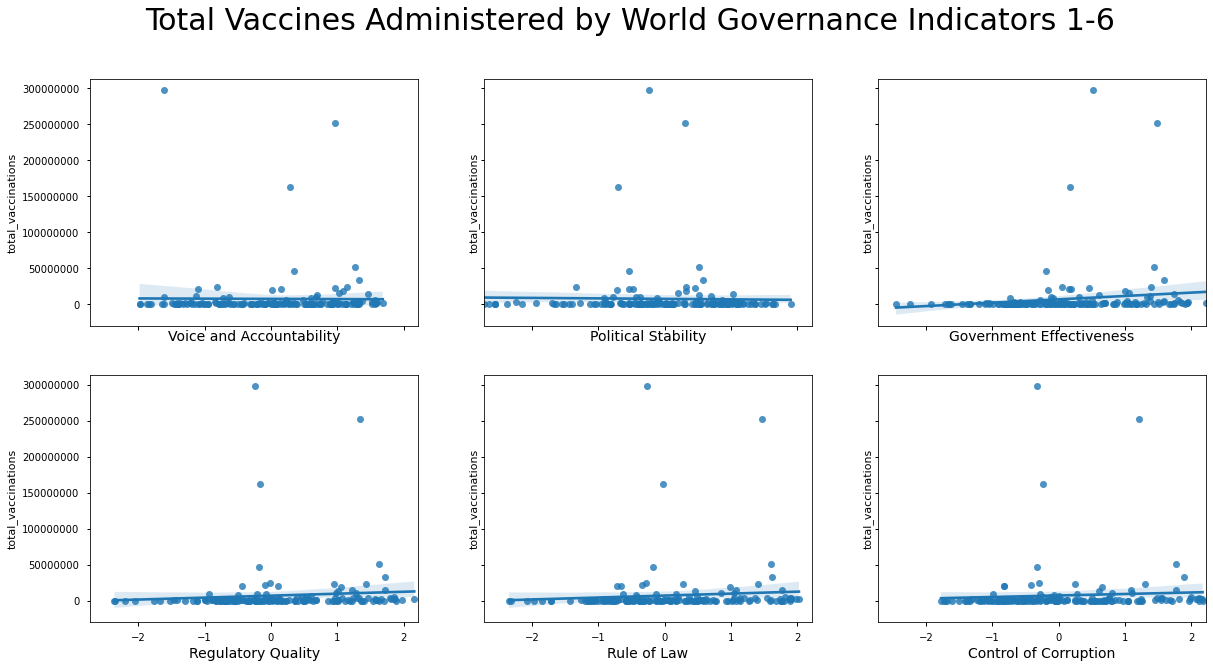

In [67]:
# WGIs and total vaccines administered
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Total Vaccines Administered by World Governance Indicators 1-6', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='total_vaccinations', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='total_vaccinations', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='total_vaccinations', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='total_vaccinations', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='total_vaccinations', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='total_vaccinations', data=vax_wgi_df)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)

# axes[0][0].set_ylabel('Total Vaccines administered', fontsize=14)
# axes[1][0]
plt.show()

### 2. For each WGI, how does the governance quality estimate relate to the number of people partially vaccinated?

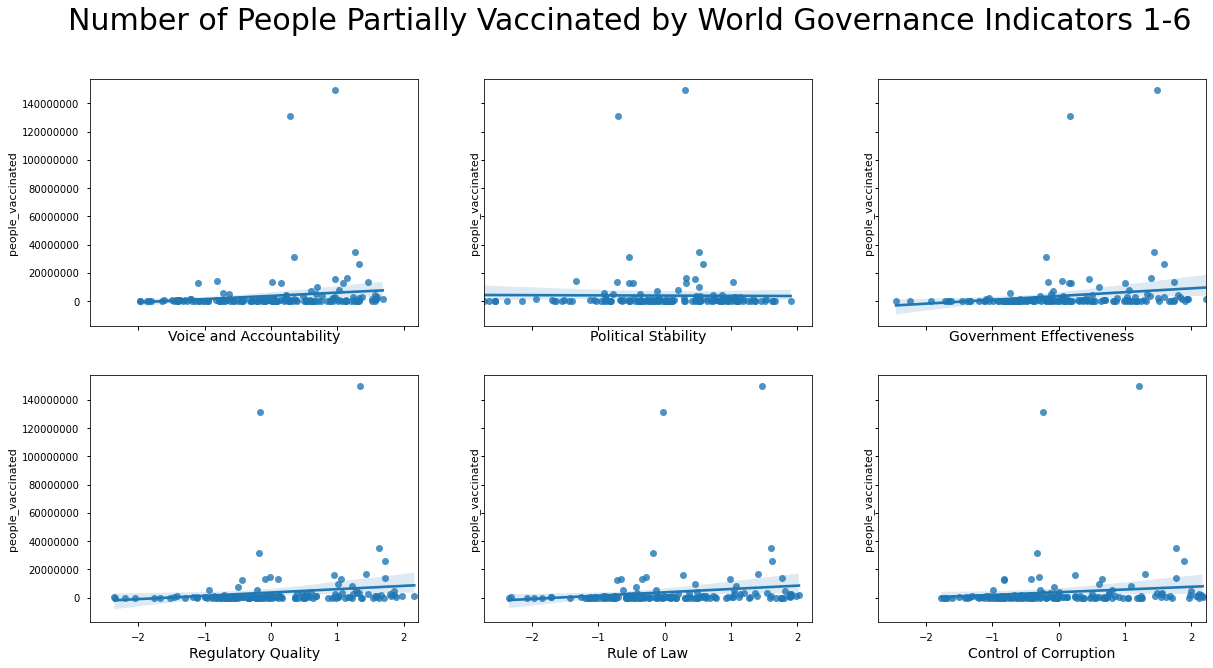

In [68]:
# WGIs and people partially vaccinated
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Number of People Partially Vaccinated by World Governance Indicators 1-6', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='people_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='people_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='people_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='people_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='people_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='people_vaccinated', data=vax_wgi_df)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

### 3. For each WGI, how does the governance quality estimate relate to the number of people fully vaccinated?

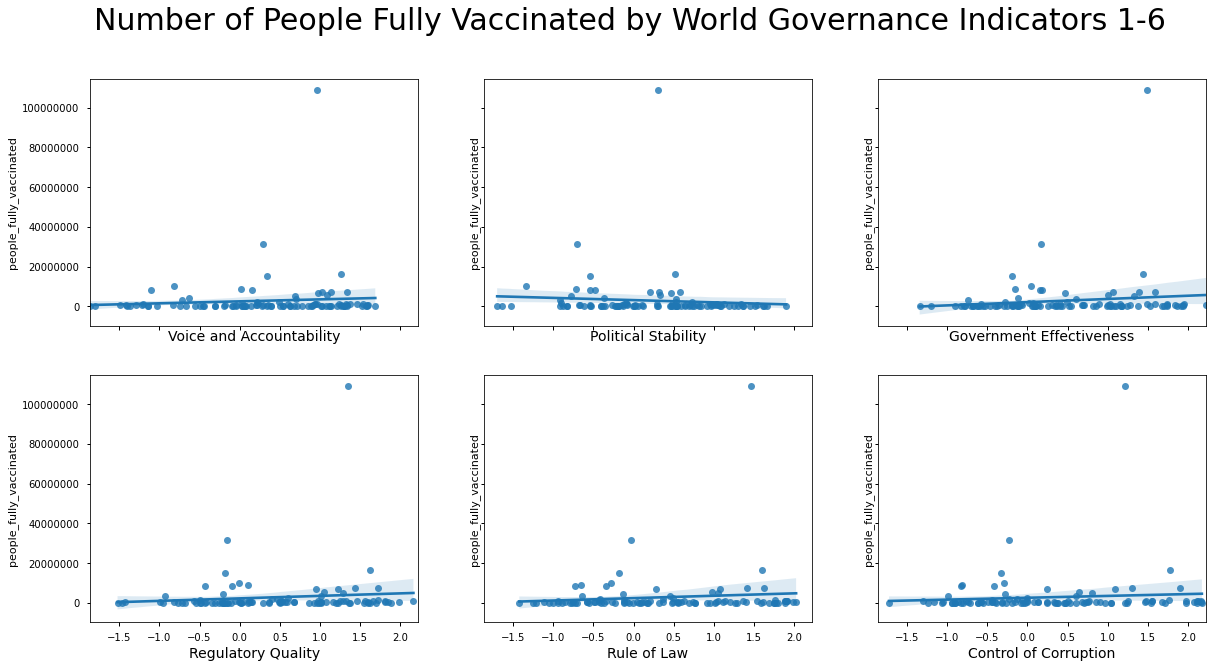

In [69]:
# WGIs and people fully vaccinated
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Number of People Fully Vaccinated by World Governance Indicators 1-6', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='people_fully_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='people_fully_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='people_fully_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='people_fully_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='people_fully_vaccinated', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='people_fully_vaccinated', data=vax_wgi_df)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

#### Observations for EDA 1:

- None of the 3 vaccination metrics show any meaningful correlation with any of the governance indicators.
- There are some pretty notable outliers of each metric.

##### –––> Let's see what happens if we get rid of those outliers. Do we then see any meaningful correlation?

In [70]:
# What are the outliers?
vax_wgi_df.loc[vax_wgi_df['total_vaccinations'] > 150000000]

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
29,China,CHN,-1.612372,0.124039,11.0,6.403941,3.448276,10.344828,-0.240383,0.227832,8.0,38.095238,23.333334,53.809525,0.518253,0.210643,9.0,71.634613,59.615383,77.403847,-0.244614,0.175415,10.0,42.788460,33.173077,57.211540,-0.274719,0.150203,12.0,45.192307,32.211540,52.403847,-0.323497,0.135967,11.0,43.269230,32.692307,51.442307,China,CHN,297734000.0,NaN,NaN,20.69,NaN,NaN
69,India,IND,0.293989,0.123936,12.0,57.635468,49.753696,62.561577,-0.702768,0.227832,8.0,21.428572,12.380953,34.761906,0.171554,0.201599,10.0,59.615383,45.192307,70.673080,-0.160556,0.173645,11.0,48.557693,35.096153,60.576923,-0.030758,0.147129,13.0,52.403847,45.192307,60.576923,-0.233254,0.132382,13.0,47.596153,35.096153,55.769230,India,IND,162603603.0,131058890.0,31544713.0,11.78,9.50,2.29
158,United States,USA,0.965248,0.136447,11.0,78.817734,71.428574,87.684731,0.297986,0.227832,8.0,57.619049,46.190475,68.571426,1.489182,0.229018,7.0,91.346153,83.653847,97.596153,1.345358,0.220553,8.0,88.942307,78.846153,95.192307,1.461094,0.157877,11.0,89.903847,86.057693,92.788460,1.215326,0.149853,11.0,84.615387,81.250000,89.423080,United States,USA,251973752.0,149462265.0,108926627.0,75.34,44.69,32.57


In [71]:
vax_wgi_df.loc[vax_wgi_df['people_vaccinated'] > 80000000]

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
69,India,IND,0.293989,0.123936,12.0,57.635468,49.753696,62.561577,-0.702768,0.227832,8.0,21.428572,12.380953,34.761906,0.171554,0.201599,10.0,59.615383,45.192307,70.673080,-0.160556,0.173645,11.0,48.557693,35.096153,60.576923,-0.030758,0.147129,13.0,52.403847,45.192307,60.576923,-0.233254,0.132382,13.0,47.596153,35.096153,55.76923,India,IND,162603603.0,131058890.0,31544713.0,11.78,9.50,2.29
158,United States,USA,0.965248,0.136447,11.0,78.817734,71.428574,87.684731,0.297986,0.227832,8.0,57.619049,46.190475,68.571426,1.489182,0.229018,7.0,91.346153,83.653847,97.596153,1.345358,0.220553,8.0,88.942307,78.846153,95.192307,1.461094,0.157877,11.0,89.903847,86.057693,92.788460,1.215326,0.149853,11.0,84.615387,81.250000,89.42308,United States,USA,251973752.0,149462265.0,108926627.0,75.34,44.69,32.57


In [72]:
vax_wgi_df.loc[vax_wgi_df['people_fully_vaccinated'] > 80000000]

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
158,United States,USA,0.965248,0.136447,11.0,78.817734,71.428574,87.684731,0.297986,0.227832,8.0,57.619049,46.190475,68.571426,1.489182,0.229018,7.0,91.346153,83.653847,97.596153,1.345358,0.220553,8.0,88.942307,78.846153,95.192307,1.461094,0.157877,11.0,89.903847,86.057693,92.78846,1.215326,0.149853,11.0,84.615387,81.25,89.42308,United States,USA,251973752.0,149462265.0,108926627.0,75.34,44.69,32.57


##### –––> So the US in particular is an outlier in all three metrics of vaccine distribution!

In [73]:
# Exclude the outliers
vax_wgi_df_no_outliers = vax_wgi_df.copy()
vax_wgi_df_no_outliers = vax_wgi_df_no_outliers.loc[(vax_wgi_df_no_outliers['total_vaccinations'] < 150000000) & 
                                                    (vax_wgi_df_no_outliers['people_vaccinated'] < 80000000) & 
                                                    (vax_wgi_df_no_outliers['people_fully_vaccinated'] < 80000000)] 

## EDA 2: Cumulative Metrics of Vaccinations -- Excluding Outliers

##### Now, let's do the first 3 plots again to see what it looks like without outliers now.

### 1. For each WGI, how does the governance quality estimate relate to total number of vaccines administered?

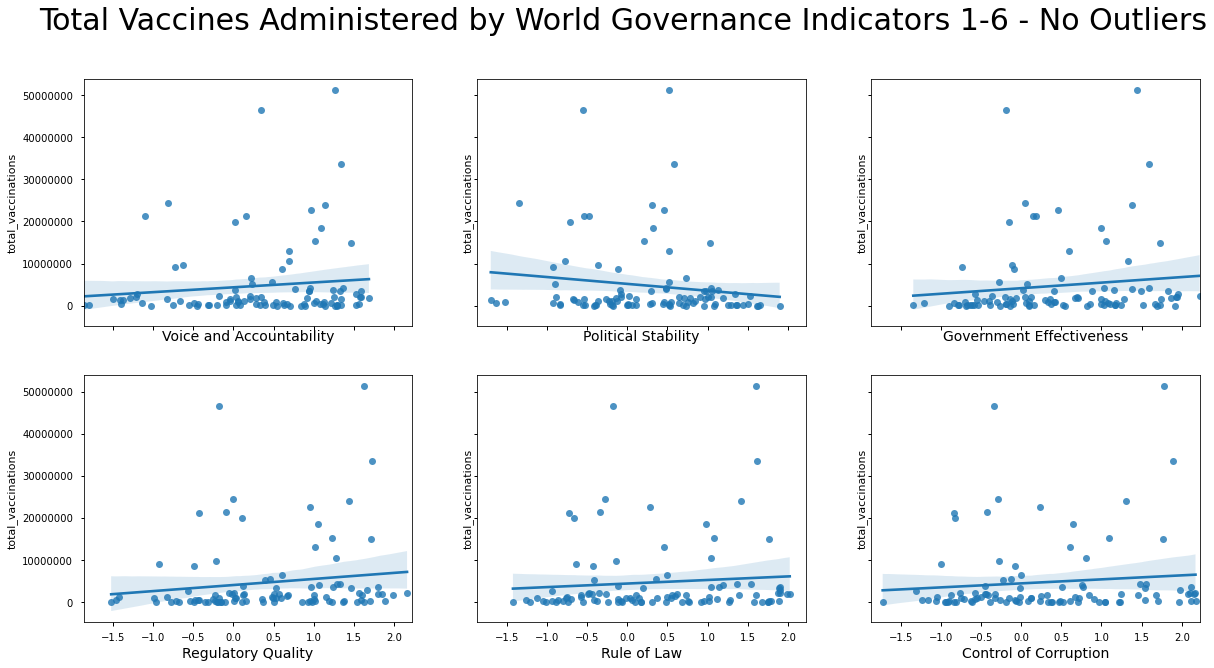

In [74]:
# WGIs and total vaccines administered
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Total Vaccines Administered by World Governance Indicators 1-6 - No Outliers', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='total_vaccinations', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='total_vaccinations', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='total_vaccinations', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='total_vaccinations', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='total_vaccinations', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='total_vaccinations', data=vax_wgi_df_no_outliers)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

### 2. For each WGI, how does the governance quality estimate relate to the number of people partially vaccinated?

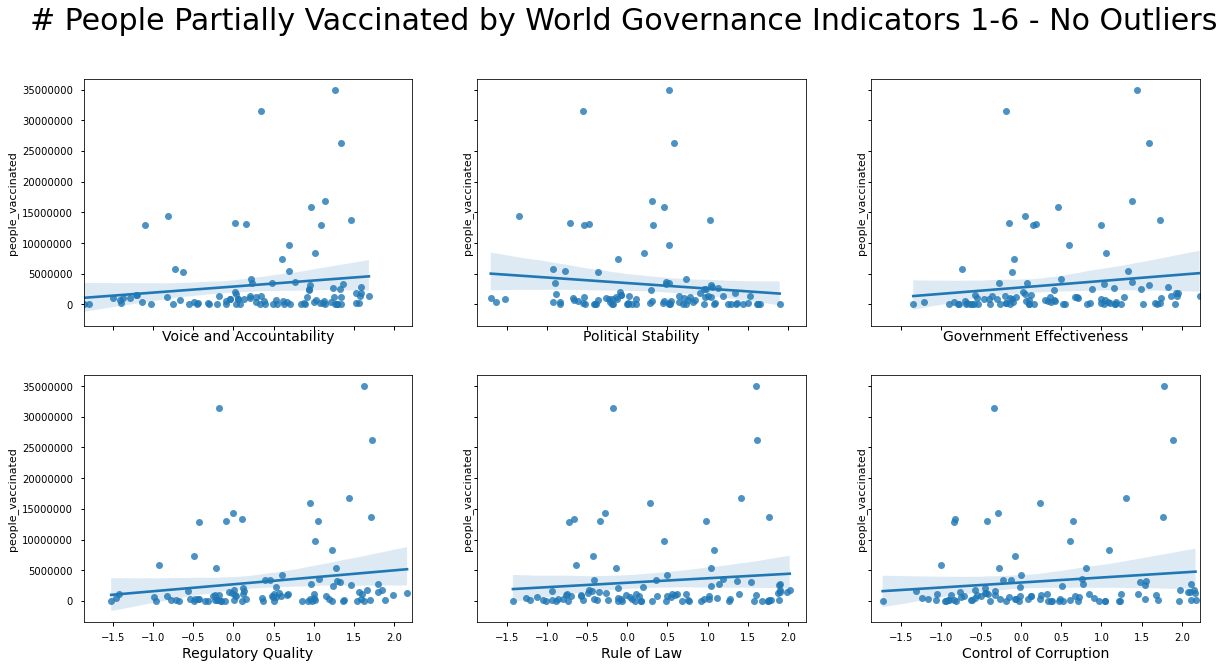

In [75]:
# WGIs and people partially vaccinated
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('# People Partially Vaccinated by World Governance Indicators 1-6 - No Outliers', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='people_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='people_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='people_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='people_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='people_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='people_vaccinated', data=vax_wgi_df_no_outliers)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

### 3. For each WGI, how does the governance quality estimate relate to the number of people fully vaccinated?

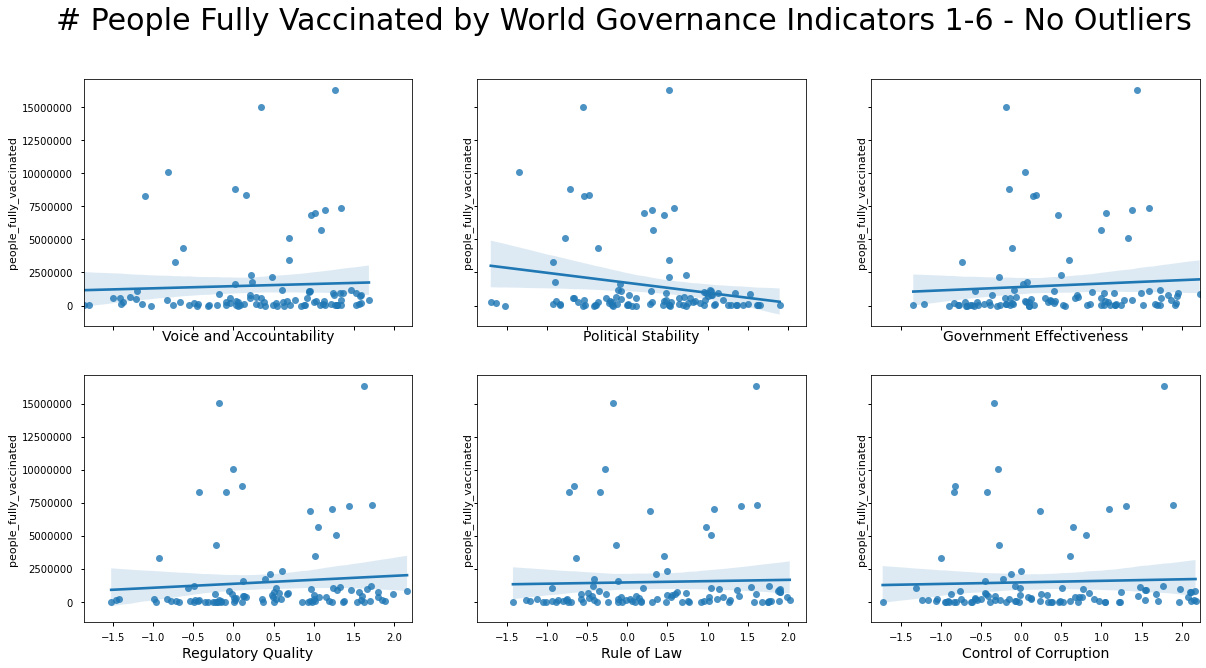

In [76]:
# WGIs and people fully vaccinated
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('# People Fully Vaccinated by World Governance Indicators 1-6 - No Outliers', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='people_fully_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='people_fully_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='people_fully_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='people_fully_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='people_fully_vaccinated', data=vax_wgi_df_no_outliers)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='people_fully_vaccinated', data=vax_wgi_df_no_outliers)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

#### Observations for EDA 2:

- For all 3 vaccination metrics, all indicators except Political Stability, show a slight positive correlation or no correlation between quality of goverance estimate and vaccine delivery.

##### –––> Maybe accounting for differences in population size will produce more meaningful patterns.

## EDA 3: Metrics of Vaccinations that Account for Population Size

### 1. For each WGI, how does the governance quality estimate relate to total number of vaccines administered per 100 people?

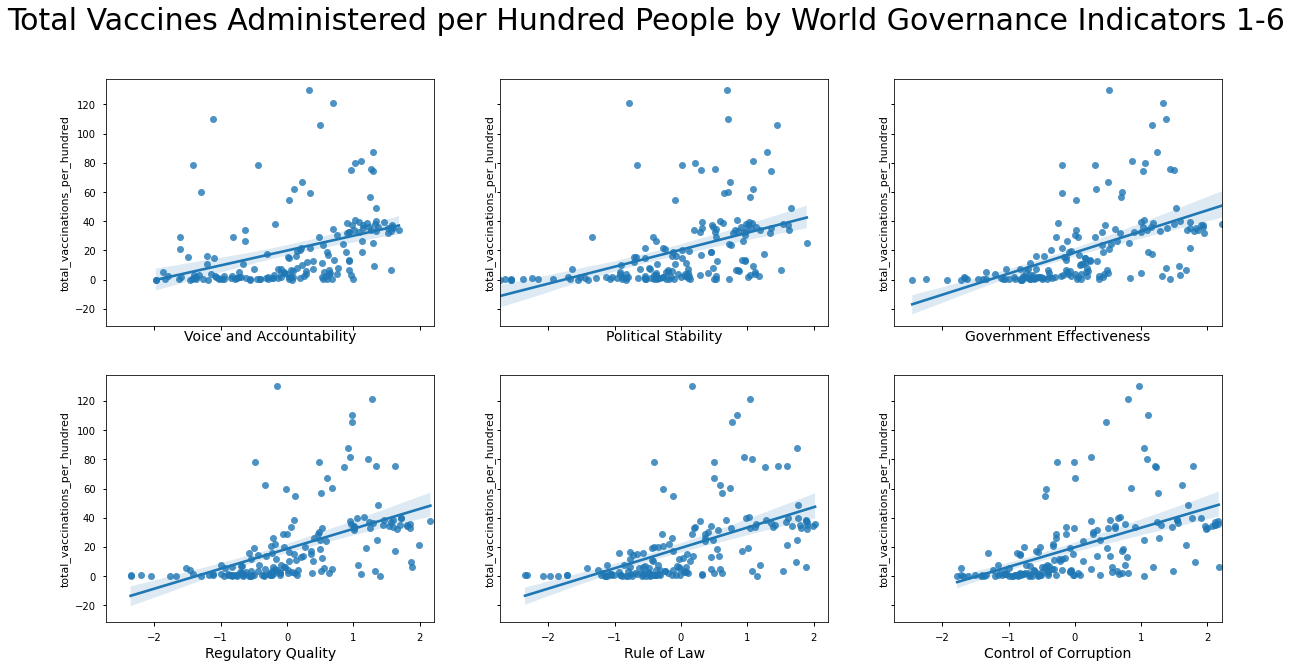

In [77]:
# WGIs and total vaccines administered as a proportion of population 
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Total Vaccines Administered per Hundred People by World Governance Indicators 1-6', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='total_vaccinations_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='total_vaccinations_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='total_vaccinations_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='total_vaccinations_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='total_vaccinations_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='total_vaccinations_per_hundred', data=vax_wgi_df)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

### 2. For each WGI, how does the governance quality estimate relate to the percentage of the population partially vaccinated?

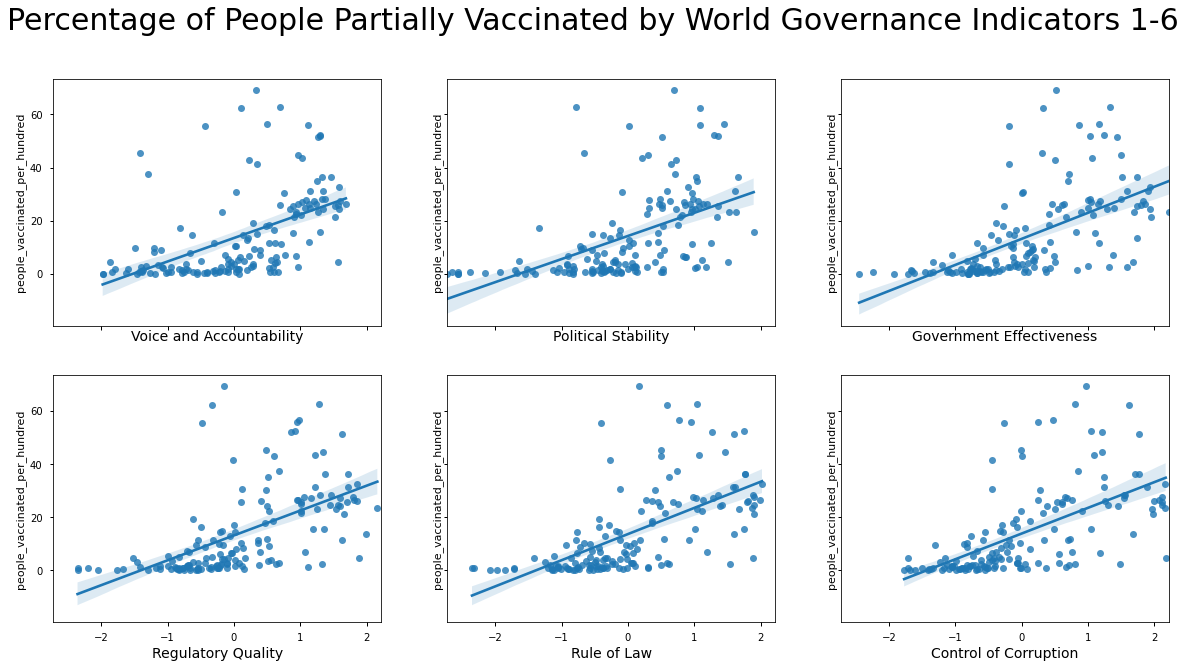

In [78]:
# WGIs and Percent of people partially vaccinated
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Percentage of People Partially Vaccinated by World Governance Indicators 1-6', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='people_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='people_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='people_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='people_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='people_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='people_vaccinated_per_hundred', data=vax_wgi_df)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

### 3. For each WGI, how does the governance quality estimate relate to the percentage of the population fully vaccinated?

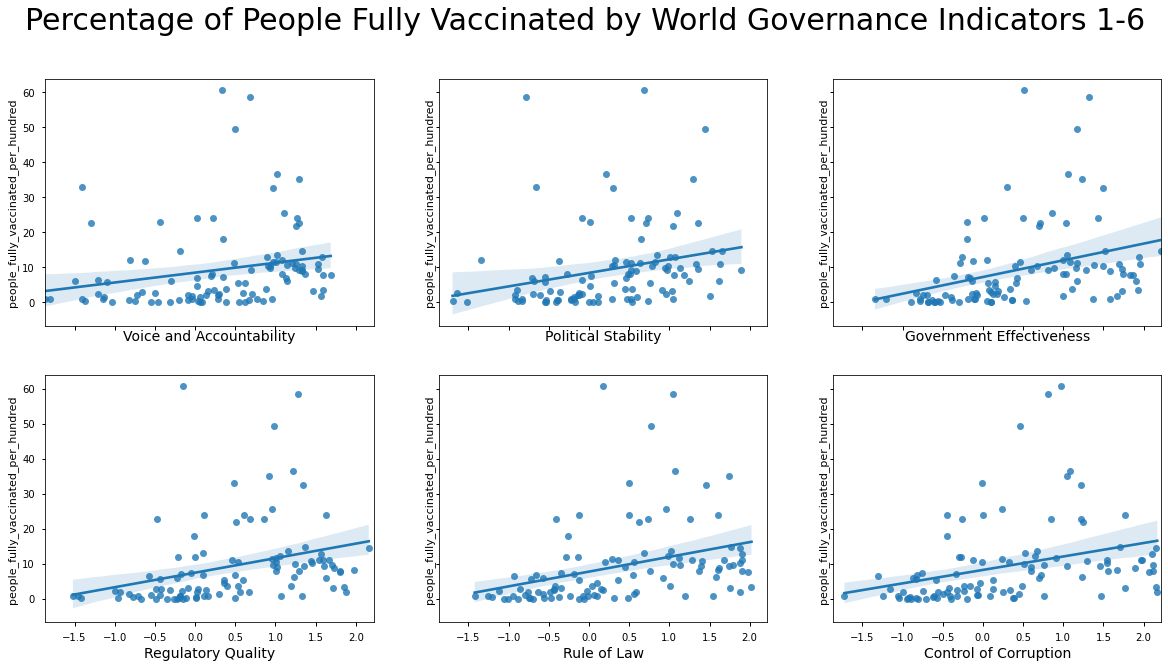

In [79]:
# WGIs and Percent of people fully vaccinated
fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Percentage of People Fully Vaccinated by World Governance Indicators 1-6', fontsize=30)

_ = sns.regplot(ax=axes[0][0], x='2019_Estimate_wgi1', y='people_fully_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][1], x='2019_Estimate_wgi2', y='people_fully_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[0][2], x='2019_Estimate_wgi3', y='people_fully_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][0], x='2019_Estimate_wgi4', y='people_fully_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][1], x='2019_Estimate_wgi5', y='people_fully_vaccinated_per_hundred', data=vax_wgi_df)
_ = sns.regplot(ax=axes[1][2], x='2019_Estimate_wgi6', y='people_fully_vaccinated_per_hundred', data=vax_wgi_df)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

#### Observations for EDA 3:

- Overall, it looks like there is indeed a notable correlation for all 6 governance indicators and the 3 metrics of vaccine distribution by population size.
- For the 3rd metric (% fully vaccinated) the correlatino appears less strong for all indicators. The slop of the line of best fit is flatter. This is likely due to the fact that over 50% of the countries were missing data for this metric. Thus the sample of countries we see plotted here is substantially smaller than the other 2 metrics (total vaccinations per hundred and % partially vaccinated). Therefore, the 3rd metric here is not the best to use for hypothesis testing.

## ––> Chosen Metric: Percentage of Population Partially Vaccinated <––

From the exporatory analysis above, cumulative vaccination metrics (# total vaccinations, # people partially vaccinated, and # people fully vaccinated) did not show notable correlations. Thus, I will not choose to use any of those metrics in the rest of my analysis. 

The metrics that present vaccinations as a proportion of population yield more obvious correlations as discussed above. I will not choose the metric of % of people fully vaccinated because its correlations appeared weaker. That leaves:
1. Number of total vaccinations per hundred people, and
2. Percentage of population partially vaccinated.

Given the vizualizations above, both appear acceptable to select for further analysis and statistical testing, but for simplicity in interpretation I will select <b>Percentage of Population Partially Vaccinated</b> as the metric for further analysis (see below).

### 1. Create categorical variable for WGI estimates

In [80]:
# Categorical version of estimates
def get_est_category(est):
    """
    Given an integer estimate for a WGI, returns a string labeling the qualitative governance category it falls into
    Quality of Governance Qualitative Categories:
        Worse: scores between -2.5 and -1.5
        Bad: scores between -1.5 and -0.5
        Average: scores between -0.5 and 0.5
        Good: scores between 0.5 and 1.5
        Better: scores between 1.5 and 2.5
    
    Parameters:
    –––––––––––
    est: int
    
    Returns:
    ––––––––
    est: str
    
    """
    if est < -1.5:
        est = 'Worse'
    elif -1.5 <= est < -0.5:
        est = 'Bad'
    elif -0.5 <= est < 0.5:
        est = 'Average'
    elif 0.5 <= est < 1.5:
        est = 'Good'
    elif est >= 1.5:
        est = 'Better'
        
    return est

In [81]:
vax_wgi_df_est_categories = vax_wgi_df.copy()
vax_wgi_df_est_categories['2019_Estimate_Category_wgi1'] = [get_est_category(i) for i in vax_wgi_df_est_categories['2019_Estimate_wgi1']]
vax_wgi_df_est_categories['2019_Estimate_Category_wgi2'] = [get_est_category(i) for i in vax_wgi_df_est_categories['2019_Estimate_wgi2']]
vax_wgi_df_est_categories['2019_Estimate_Category_wgi3'] = [get_est_category(i) for i in vax_wgi_df_est_categories['2019_Estimate_wgi3']]
vax_wgi_df_est_categories['2019_Estimate_Category_wgi4'] = [get_est_category(i) for i in vax_wgi_df_est_categories['2019_Estimate_wgi4']]
vax_wgi_df_est_categories['2019_Estimate_Category_wgi5'] = [get_est_category(i) for i in vax_wgi_df_est_categories['2019_Estimate_wgi5']]
vax_wgi_df_est_categories['2019_Estimate_Category_wgi6'] = [get_est_category(i) for i in vax_wgi_df_est_categories['2019_Estimate_wgi6']]

In [82]:
vax_wgi_df_est_categories.head() # scroll over

,Country/Territory,Code,2019_Estimate_wgi1,2019_StdErr_wgi1,2019_NumSrc_wgi1,2019_Rank_wgi1,2019_Lower_wgi1,2019_Upper_wgi1,2019_Estimate_wgi2,2019_StdErr_wgi2,2019_NumSrc_wgi2,2019_Rank_wgi2,2019_Lower_wgi2,2019_Upper_wgi2,2019_Estimate_wgi3,2019_StdErr_wgi3,2019_NumSrc_wgi3,2019_Rank_wgi3,2019_Lower_wgi3,2019_Upper_wgi3,2019_Estimate_wgi4,2019_StdErr_wgi4,2019_NumSrc_wgi4,2019_Rank_wgi4,2019_Lower_wgi4,2019_Upper_wgi4,2019_Estimate_wgi5,2019_StdErr_wgi5,2019_NumSrc_wgi5,2019_Rank_wgi5,2019_Lower_wgi5,2019_Upper_wgi5,2019_Estimate_wgi6,2019_StdErr_wgi6,2019_NumSrc_wgi6,2019_Rank_wgi6,2019_Lower_wgi6,2019_Upper_wgi6,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,2019_Estimate_Category_wgi1,2019_Estimate_Category_wgi2,2019_Estimate_Category_wgi3,2019_Estimate_Category_wgi4,2019_Estimate_Category_wgi5,2019_Estimate_Category_wgi6
0,Aruba,ABW,1.294189,0.268796,1.0,92.610840,73.891624,100.000000,1.357372,0.271196,3.0,95.238098,79.047623,99.523811,1.029933,0.328407,2.0,80.288460,69.711540,92.307693,0.857360,0.359080,2.0,75.961540,63.461540,90.865387,1.263128,0.211013,3.0,86.538460,78.846153,91.826920,1.217238,0.286103,2.0,85.096153,75.961540,92.307693,Aruba,ABW,79553.0,55371.0,24182.0,74.51,51.86,22.65,Good,Good,Good,Good,Good,Good
1,Andorra,AND,1.139154,0.219417,2.0,87.192116,72.906403,96.059113,1.615139,0.290278,3.0,98.571426,90.952377,100.000000,1.908749,0.459675,1.0,98.076920,84.134613,100.000000,1.228176,0.489078,1.0,86.057693,66.826920,99.519234,1.579939,0.495012,1.0,90.865387,76.923080,100.000000,1.234392,0.409163,1.0,87.500000,70.192307,95.192307,Andorra,AND,28881.0,24182.0,4699.0,37.38,31.30,6.08,Good,Better,Better,Good,Better,Good
2,Afghanistan,AFG,-0.988032,0.127851,10.0,21.674877,15.763547,25.123152,-2.649407,0.241833,6.0,0.952381,0.000000,2.857143,-1.463875,0.237956,8.0,7.211538,1.923077,13.461538,-1.120555,0.191706,9.0,10.096154,6.250000,19.711538,-1.713527,0.157939,11.0,4.326923,0.961538,5.288462,-1.401076,0.157075,10.0,6.730769,1.923077,12.019231,Afghanistan,AFG,240000.0,240000.0,NaN,0.62,0.62,NaN,Bad,Worse,Bad,Bad,Worse,Bad
3,Angola,AGO,-0.777283,0.123522,11.0,25.615763,21.674877,30.049261,-0.311101,0.239387,6.0,35.238094,20.952381,50.000000,-1.117144,0.190136,10.0,12.980769,7.211538,19.711538,-0.893871,0.173091,10.0,16.346153,9.615385,29.326923,-1.054343,0.150109,12.0,13.461538,6.730769,20.673077,-1.054683,0.152658,11.0,13.942307,9.134615,23.076923,Angola,AGO,456349.0,456349.0,NaN,1.39,1.39,NaN,Bad,Average,Bad,Bad,Bad,Bad
4,Albania,ALB,0.151805,0.125065,10.0,52.216747,42.857143,59.113300,0.118570,0.233699,7.0,52.857143,37.142857,62.380951,-0.061331,0.217043,8.0,50.480770,36.538460,63.461540,0.274380,0.183593,9.0,63.942307,53.365383,71.634613,-0.411179,0.139640,12.0,38.942307,27.403847,47.115383,-0.528758,0.142793,11.0,33.173077,25.000000,44.230770,Albania,ALB,572226.0,NaN,NaN,19.88,NaN,NaN,Average,Average,Average,Average,Average,Bad


In [83]:
est_category_order = ['Worse', 'Bad', 'Average', 'Good', 'Better']

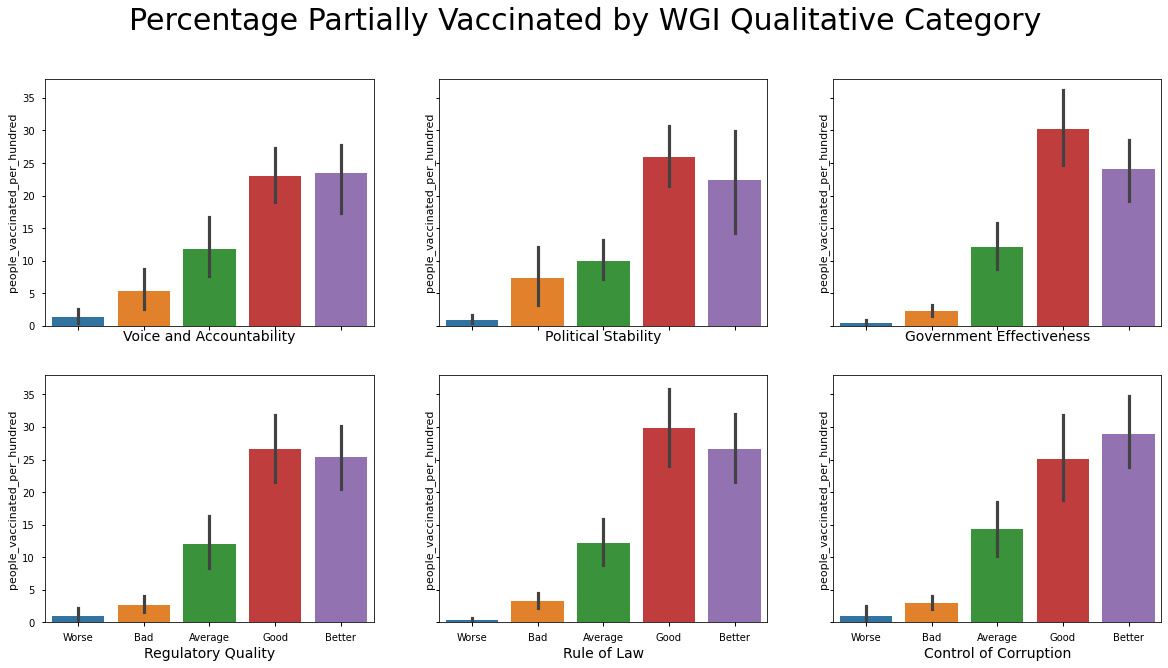

In [84]:
# WGI estimate categories and percent of population partially vaccinated 
# Exclude NaN values in people_vaccinated_per_hundred column only
vax_wgi_df_est_categories_partial_vax = vax_wgi_df_est_categories.copy()
vax_wgi_df_est_categories_partial_vax = vax_wgi_df_est_categories_partial_vax.loc[vax_wgi_df_est_categories_partial_vax['people_vaccinated_per_hundred'].isna() == False]

# Create this figure inside a function so it can be called later 
def vax_wgi_fig():
    
    fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

    axes[0][0].ticklabel_format(style='plain')
    axes[1][0].ticklabel_format(style='plain')

    fig.suptitle('Percentage Partially Vaccinated by WGI Qualitative Category', fontsize=30)

    _ = sns.barplot(ax=axes[0][0], x='2019_Estimate_Category_wgi1', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
    _ = sns.barplot(ax=axes[0][1], x='2019_Estimate_Category_wgi2', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
    _ = sns.barplot(ax=axes[0][2], x='2019_Estimate_Category_wgi3', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
    _ = sns.barplot(ax=axes[1][0], x='2019_Estimate_Category_wgi4', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
    _ = sns.barplot(ax=axes[1][1], x='2019_Estimate_Category_wgi5', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
    _ = sns.barplot(ax=axes[1][2], x='2019_Estimate_Category_wgi6', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)

    axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
    axes[0][1].set_xlabel('Political Stability', fontsize=14)
    axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
    axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
    axes[1][1].set_xlabel('Rule of Law', fontsize=14)
    axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
    plt.show()

vax_wgi_fig()

#### Observations:
- In general, there appears to be a trend where countries with GOOD and BETTER governance have a higher average percentage of their populations at least partially vaccinated, compared to countries with WORSE and BAD governance. 

To determine which (if any) of these differences are statistically significant, we can do statistical tests below. 

### Hypothesis Testing with Welch ANOVA and Games-Howell tests: 

<b>Null Hypothesis (H0)</b>: There is <b>no</b> statistically significant difference between any level of governance quality in terms of percent of population partially vaccinated.

<b>Alternative Hypothesis (H1)</b>: There <b>is</b> a statistically significant difference between some levels of governance quality in terms of percent of population partially vaccinated.

To test these hypotheses, I have chosen to do a combination of ANOVA and Games-Howell tests.
1. Welch ANOVA (Analysis of Variance): 
    - Source: 
        - Welch, Bernard Lewis. “On the comparison of several mean values: an alternative approach.” Biometrika 38.3/4 (1951): 330-336.
    - ANOVA is a test that allows me to compare the differences in means between multiple independent variables/groups (Worse, Bad, Average, Good, and Better governance categories) and a single quantitative dependent variable (% of population partially vaccinated). Welch ANOVA is appropriate for this analysis because the WGI data does not display homogeneity of variance and Welch ANOVA it has been shown to be robust even when the underlying data does not display homogeneity of variance, unlike regular one-way ANOVA (Source: Liu, Hangcheng. “Comparing Welch’s ANOVA, a Kruskal-Wallis test and traditional ANOVA in case of Heterogeneity of Variance.” (2015).). 
2. Games-Howell Tests: 
    - Sources: 
        - Games, Paul A., and John F. Howell. “Pairwise multiple comparison procedures with unequal n’s and/or variances: a Monte Carlo study.” Journal of Educational Statistics 1.2 (1976): 113-125.
        - http://web.pdx.edu/~newsomj/uvclass/ho_posthoc.pdf  
    - This is a post hoc test that is used after Welch ANOVA. It is very similar to Tukey HSD's t-tests but again much more robust when dealing with data that does not have homogeneous variances. 

##### Here is what I mean when I say the data does not show homogeneity of variance. In fact the variances are quite heterogeneous.

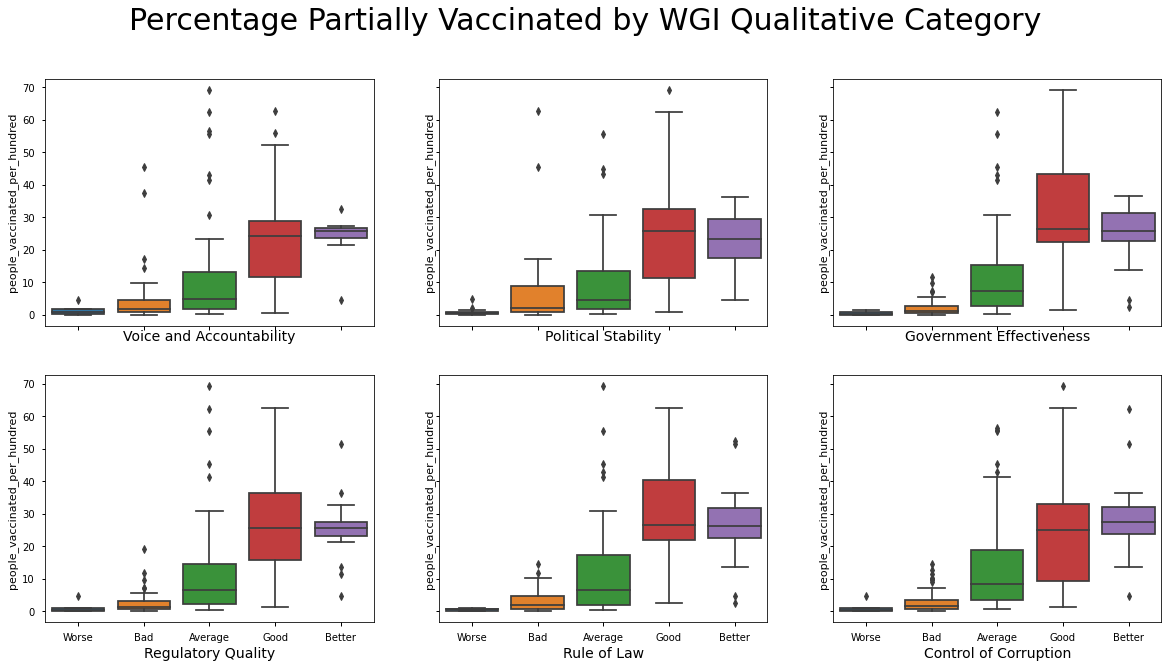

In [85]:
# WGI estimate categories and percent of population partially vaccinated 

# Exclude NaN values in people_vaccinated_per_hundred column only
vax_wgi_df_est_categories_partial_vax = vax_wgi_df_est_categories.copy()
vax_wgi_df_est_categories_partial_vax = vax_wgi_df_est_categories_partial_vax.loc[vax_wgi_df_est_categories_partial_vax['people_vaccinated_per_hundred'].isna() == False]

fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(20,10))

axes[0][0].ticklabel_format(style='plain')
axes[1][0].ticklabel_format(style='plain')

fig.suptitle('Percentage Partially Vaccinated by WGI Qualitative Category', fontsize=30)

_ = sns.boxplot(ax=axes[0][0], x='2019_Estimate_Category_wgi1', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
_ = sns.boxplot(ax=axes[0][1], x='2019_Estimate_Category_wgi2', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
_ = sns.boxplot(ax=axes[0][2], x='2019_Estimate_Category_wgi3', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
_ = sns.boxplot(ax=axes[1][0], x='2019_Estimate_Category_wgi4', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
_ = sns.boxplot(ax=axes[1][1], x='2019_Estimate_Category_wgi5', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)
_ = sns.boxplot(ax=axes[1][2], x='2019_Estimate_Category_wgi6', y='people_vaccinated_per_hundred', data=vax_wgi_df_est_categories_partial_vax, order=est_category_order)

axes[0][0].set_xlabel('Voice and Accountability', fontsize=14)
axes[0][1].set_xlabel('Political Stability', fontsize=14)
axes[0][2].set_xlabel('Government Effectiveness', fontsize=14)
axes[1][0].set_xlabel('Regulatory Quality', fontsize=14)
axes[1][1].set_xlabel('Rule of Law', fontsize=14)
axes[1][2].set_xlabel('Control of Corruption', fontsize=14)
plt.show()

In [86]:
def do_welch_anova(df, dep_var, wgi_num):
    """
    Does Welch ANOVA on given dataframe, with respect to given dependent variable and wgi number
    
    Parameters:
    –––––––––––
    df: dataframe
    dep_var: str
    wgi_num: int
    
    Returns:
    ––––––––
    aov = str
    """
    aov = pg.welch_anova(dv=dep_var, between=f'2019_Estimate_Category_wgi{wgi_num}', data=df)
    
    return aov

In [87]:
# Apply function to get Welch ANOVA calculations for each WGI
for num in range(6):
    result = do_welch_anova(vax_wgi_df_est_categories_partial_vax, 'people_vaccinated_per_hundred', (num+1))
    print(f'Welch ANOVA for percent partially vaccinated per hundred -- wgi{num+1}: \n', result, '\n')

Welch ANOVA for percent partially vaccinated per hundred -- wgi1: 
                         Source  ddof1      ddof2          F         p-unc  \
0  2019_Estimate_Category_wgi1      4  39.631158  36.440146  8.751321e-13   

        np2  
0  0.224318   

Welch ANOVA for percent partially vaccinated per hundred -- wgi2: 
                         Source  ddof1      ddof2         F         p-unc  \
0  2019_Estimate_Category_wgi2      4  29.751747  36.19932  4.948463e-11   

        np2  
0  0.293321   

Welch ANOVA for percent partially vaccinated per hundred -- wgi3: 
                         Source  ddof1      ddof2          F         p-unc  \
0  2019_Estimate_Category_wgi3      4  57.739534  55.425876  4.054029e-19   

        np2  
0  0.429252   

Welch ANOVA for percent partially vaccinated per hundred -- wgi4: 
                         Source  ddof1      ddof2          F         p-unc  \
0  2019_Estimate_Category_wgi4      4  50.487632  43.897248  7.559501e-16   

        np2  
0  0.3

#### Observations: 
- For each world governance indicator, the p-value is less than 0.05. 
- This means that there is at least ONE statistically significant difference between the quality of governance categories (Worse, Bad, Average, Good, Better) and the % of population partially vaccinated. 

##### –––> To determine where the significant differences are we will use the Games-Howell post hoc test.


Games-Howell will run pairwise comparisons of means for each pairing of governance quality categories (10 total). For each comparison we can use the following hypotheses, which are essentially the same as previously stated but more specific to each comparison.

<b>Null Hypothesis (H0)</b>: There is <b>no</b> statistically significant difference between {these two levels of governance quality} in terms of percent of population partially vaccinated.

<b>Alternative Hypothesis (H1)</b>: There <b>is</b> a statistically significant difference between {these two levels of governance quality} in terms of percent of population partially vaccinated.

In [88]:
def do_gameshowell(df, dep_var, indep_var):
    """
    does games-howell post hoc test given a dataframe, dependent variable, and independent variable
    
    Parameters:
    –––––––––––
    df: dataframe
    dep_var: str
    indep_var: str
    
    Returns:
    ––––––––
    gh: dataframe
    """
    gh = pg.pairwise_gameshowell(data=df, 
                                 dv=dep_var, 
                                 between=indep_var).round(3)
    gh['reject'] = [True if p<=0.05 else False for p in gh['pval']]
    
    return gh

In [89]:
# FOR PERCENTAGE OF POPULATION PARTIALL VACCINATED

for num in range(6):
    result = do_gameshowell(vax_wgi_df_est_categories_partial_vax, 
                            'people_vaccinated_per_hundred', 
                            f'2019_Estimate_Category_wgi{num+1}').round(3)
    
    print(f'wgi{num+1} -- Percent Partially Vaccinated')
    pg.print_table(result)

wgi1 -- Percent Partially Vaccinated

POST HOC TESTS

A        B         mean(A)    mean(B)     diff     se       T       df    pval    hedges  reject
-------  ------  ---------  ---------  -------  -----  ------  -------  ------  --------  --------
Average  Bad        11.838      5.383    6.455  2.895   2.230   83.471   0.179     0.479  False
Average  Better     11.838     23.524  -11.686  3.783  -3.089   18.185   0.044    -1.158  True
Average  Good       11.838     23.040  -11.202  3.206  -3.494  100.860   0.006    -0.680  True
Average  Worse      11.838      1.316   10.522  2.463   4.272   55.925   0.001     1.697  True
Bad      Better      5.383     23.524  -18.141  3.365  -5.392   11.824   0.001    -2.070  True
Bad      Good        5.383     23.040  -17.657  2.700  -6.541   85.507   0.001    -1.406  True
Bad      Worse       5.383      1.316    4.067  1.753   2.320   40.833   0.160     0.941  False
Better   Good       23.524     23.040    0.484  3.636   0.133   15.823   0.900     

#### Observations:
- Where the table above indicates True in the 'reject' column, <b><i><u>we reject the null hypothesis in favor of the alternative hypothesis.</u></i></b> This means that there is a significant difference between the two quality of governance categories. 


- <b>WGI 1 - Voice and Accountability:</b>
    - BAD is not significantly different from AVERAGE
    - BAD is not significantly different from WORSE
    - BETTER is not significantly different from GOOD
- <b>WGI 2 - Political Stability:</b>
    - AVERAGE not significantly different from BAD or BETTER
    - BAD not significantly different from BETTER
    - BAD not significantly different from WORSE
    - GOOD not significantly different from BETTER
- <b>WGI 3 - Government Effectiveness:</b>
    - All differences are significant except between GOOD/BETTER
- <b>WGI 4 - Regulatory Quality:</b>
    - All differences are significant except between GOOD/BETTER and WORSE/BAD
- <b>WGI 5 - Rule of Law:</b>
    - All differences are significant except between GOOD/BETTER
- <b>WGI 6 - Control of Corruption:</b>
    - Differences are significant except between GOOD/BETTER and WORSE/BAD and AVERAGE/GOOD

Overall trends are discussed in the findings section below.

# Findings:

From this analysis, I find that <b>Government Effectiveness, Regulatory Quality, and Rule of Law </b> are the most reliable indicators of the impact of quality of governance on vaccine delivery. I concluded this because the Post Hoc tests showed that for these three world governance indicators the differences we see in the height of the bars below are generally significantly different, except for at the upper and lower ends. This means that there is no real difference between countries that have GOOD and BETTER governance. Similarly, for the regulatory quality indicator there is no real difference between countries with BAD and WORSE goverance. However, for these three indicators, there is a reliable and signficant difference between the BAD/WORSE group, the AVERAGE group in the middle, and the GOOD/BETTER group. With this we can see clearly that countries in the GOOD/BETTER group have delivered at least one shot to a higher percentage of their populations. On average, the GOOD/BETTER group has partially vaccinated ~25% of people, while the AVERAGE group has only done so for 10-12%, and the BAD/WORSE group for 5% or less. 

For the other indicators (<b>Voice and Accountability, Political Stability, and Control of Corruption</b>) this trend discussed above can still be deduced but it is weaker because in each of these indicators there is not a significant difference between AVERAGE group and either the upper or lower end or governance quality. In other words, either a GOOD/BETTER/AVERAGE group is different from BAD/WORSE or a BAD/WORSE/AVERAGE group is different from GOOD/BETTER, but that is all we can conclude. 

The case of the <b>political stability indicator</b> is further complicated by the fact that BAD is not different than BETTER. This is probably because of what the political stability indicator measures. It captures the perceived likelihood of politically-motivated violence, which is actually notably higher for many advanced, free, democratic economies (like the US). Therefore, countries we think of as politically stable actually sometimes rank poorly in this indicator. This probably increases variance in some of these governance categories and makes it difficult to conclude much from this indicator.


QUESTION: <b>Does the amount of vaccines delivered to people differ based on a country's quality of governance, according to a given indicator?</b>

ANSWER: <b>Yes, for government effectiveness, rule of law, and regulatory quality there is a difference in the percent of population vaccinated based quality of governance.</b>

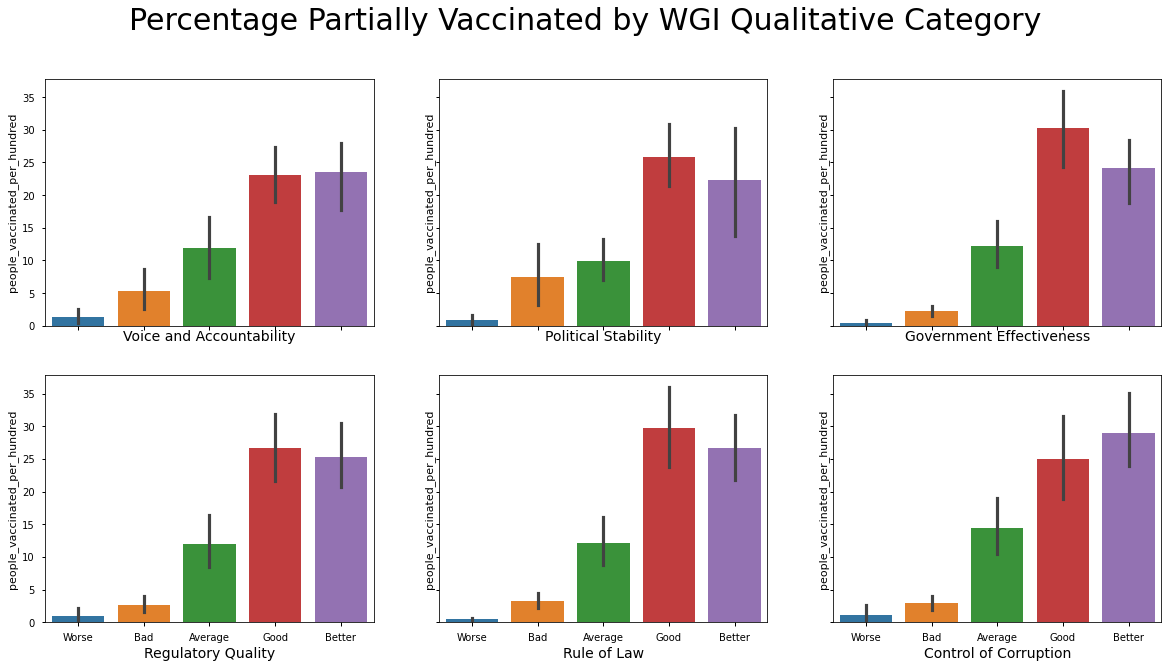

In [90]:
# Figure repeated here for convenience
vax_wgi_fig()

# Lessons Learned:

The knowledge I gained from doing this project: 

1. I learned that part of what I like about analyzing data is that it is equally technical and creative. You have to have the technical tools to do the analysis, but before that, you have to creatively thinking of how to approach solivng the task at hand. 
2. I learned a lot about statistics and that I need to study it more because doing good statistics seems important to producing quality analyses.
3. I learned not to always trust what you see in a graph/barplot... visual differences can sometimes be misleading.